<a href="https://www.kaggle.com/code/abhijitbhandari/mass-shooting-usa?scriptVersionId=103192357" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Loading Dataset

## Importing Required Libraries

In [1]:
!pip install waterfallcharts

  Preparing metadata (setup.py) ... - done
  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3413 sha256=9dd2709020fe6a667d0beb61dd0c8adb714b37216236e45614d1b9617282d827
  Stored in directory: /root/.cache/pip/wheels/4a/b2/85/9b6eda27fab2effa580c6942fb094e8536cc46e8741ec5f586
Successfully built waterfallcharts


In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import gensim.downloader as gd
from gensim.parsing.preprocessing import STOPWORDS
from textblob import TextBlob
import nltk
import string
import re
import spacy
import seaborn as sns
import scipy.spatial.distance as ssd
import gc
import numpy as np
import waterfall_chart
#import locationtagger as lt
from gensim.models import Word2Vec
from geopy.geocoders import Nominatim
import folium
from folium import plugins
from folium.plugins import HeatMap
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
pd.set_option('display.width',1000)
pd.set_option('display.max_rows',200)
#nltk.download('maxent_ne_chunker')
#nltk.download('words')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


In [3]:
os.chdir("../input/mass-shootings-in-united-states-20182022")

In [4]:
files = os.listdir(os.getcwd())
files

['shootings_2019.csv',
 'shootings_2022.csv',
 'shootings_2018.csv',
 'shootings_2020.csv',
 'shootings_2021.csv']

## Reading Dataset

In [5]:
df_2018 = pd.read_csv('shootings_2018.csv')
df_2019 = pd.read_csv('shootings_2019.csv')
df_2020 = pd.read_csv('shootings_2020.csv')
df_2021 = pd.read_csv('shootings_2021.csv')
df_2022 = pd.read_csv('shootings_2022.csv')
    
    

In [6]:
df_2018.head()

,Date,State,Dead,Injured,Total,Description
0,31/12/2018,Ohio,3,2,5,A dispute began at a rented Airbnb during a Ne...
1,29/12/2018,Ohio,1,3,4,One person was killed and three people were wo...
2,28/12/2018,Missouri,4,1,5,"A gunman shot and killed his girlfriend, her t..."
3,24/12/2018,Louisiana,2,2,4,Three people were killed and two others were w...
4,23/12/2018,Missouri,0,7,7,Seven people were wounded during a shooting at...


In [7]:
df_2019.head()

,Date,State,Dead,Injured,Total,Description
0,29/12/2019,Texas,3,0,3,West Freeway Church of Christ shooting: Two pe...
1,29/12/2019,California,0,5,5,Five people were shot outside a home after ret...
2,29/12/2019,Illinois,0,5,5,Five women aged 18 to 32 years old were injure...
3,29/12/2019,New York,1,3,4,"After an argument escalated on a front porch, ..."
4,27/12/2019,Texas,2,7,9,Two people were killed and seven injured in a ...


In [8]:
df_2020.head()

,Date,State,Dead,Injured,Total,Description
0,31/12/2020,Indiana,1,3,4,A shooting unfolded outside a nightclub on New...
1,31/12/2020,Oregon,0,4,4,Four people were wounded after a shooting at a...
2,27/12/2020,United States Virgin Islands,0,4,4,Four men were wounded after a shooting near a ...
3,26/12/2020,Massachusetts,1,5,6,Six people were wounded in an evening shooting...
4,26/12/2020,Illinois,3,3,6,Don Carter Lanes shooting: Three people are ki...


In [9]:
df_2021.head()

,Date,State,Dead,Injured,Total,Description
0,31/12/2021,Maryland,0,4,4,An adult and three juveniles were wounded in a...
1,31/12/2021,California,0,6,6,Six shoppers were wounded at a grocery superma...
2,31/12/2021,Mississippi,4,3,7,"During an outdoor New Year's Eve party, a phys..."
3,30/12/2021,Pennsylvania,0,6,6,Six shooters opened fire on a busy street with...
4,30/12/2021,Missouri,2,2,4,An adult and infant were killed and two adults...


In [10]:
df_2022.head()

,Date,State,Dead,Injured,Total,Description
0,05/06/2022,South Carolina,0,4,4,Four people were injured in a drive-by shootin...
1,05/06/2022,Michigan,3,2,5,Three people were killed and two others wounde...
2,05/06/2022,Arizona,2,2,4,Two people were killed and two others injured ...
3,05/06/2022,Tennessee,2,12,14,"2022 Chattanooga shooting: Fourteen were shot,..."
4,05/06/2022,Michigan,1,3,4,One person was killed and three others injured...


In [11]:
df = pd.concat([df_2018,df_2019,df_2020,df_2021,df_2022])
df['Date'] = pd.to_datetime(df['Date'])

In [12]:
df = df.sort_values(by=['Date'])
df.head()

,Date,State,Dead,Injured,Total,Description
321,2018-01-01,Alabama,1,3,4,A 21-year-old was killed and three others were...
267,2018-01-04,Michigan,0,5,5,Five people were injured in a shooting at a ho...
266,2018-01-04,Alabama,1,4,5,A fifteen-year-old was killed and four other p...
241,2018-01-05,Louisiana,0,5,5,Five people were injured in a shooting.
161,2018-01-07,Illinois,0,6,6,Six people were injured when a gunman opened f...


In [13]:
df.reset_index(inplace = True,drop = True)

## Rearranging Dataset 

In [14]:
df['Month'] = df['Date'].dt.month
df.head()

,Date,State,Dead,Injured,Total,Description,Month
0,2018-01-01,Alabama,1,3,4,A 21-year-old was killed and three others were...,1
1,2018-01-04,Michigan,0,5,5,Five people were injured in a shooting at a ho...,1
2,2018-01-04,Alabama,1,4,5,A fifteen-year-old was killed and four other p...,1
3,2018-01-05,Louisiana,0,5,5,Five people were injured in a shooting.,1
4,2018-01-07,Illinois,0,6,6,Six people were injured when a gunman opened f...,1


In [15]:
df['Day'] = df['Date'].dt.day_name()
df.head()

,Date,State,Dead,Injured,Total,Description,Month,Day
0,2018-01-01,Alabama,1,3,4,A 21-year-old was killed and three others were...,1,Monday
1,2018-01-04,Michigan,0,5,5,Five people were injured in a shooting at a ho...,1,Thursday
2,2018-01-04,Alabama,1,4,5,A fifteen-year-old was killed and four other p...,1,Thursday
3,2018-01-05,Louisiana,0,5,5,Five people were injured in a shooting.,1,Friday
4,2018-01-07,Illinois,0,6,6,Six people were injured when a gunman opened f...,1,Sunday


In [16]:
df['Year'] = df['Date'].dt.year
df.head()

,Date,State,Dead,Injured,Total,Description,Month,Day,Year
0,2018-01-01,Alabama,1,3,4,A 21-year-old was killed and three others were...,1,Monday,2018
1,2018-01-04,Michigan,0,5,5,Five people were injured in a shooting at a ho...,1,Thursday,2018
2,2018-01-04,Alabama,1,4,5,A fifteen-year-old was killed and four other p...,1,Thursday,2018
3,2018-01-05,Louisiana,0,5,5,Five people were injured in a shooting.,1,Friday,2018
4,2018-01-07,Illinois,0,6,6,Six people were injured when a gunman opened f...,1,Sunday,2018


## Extracting Information From Description

In [17]:
stop = list(STOPWORDS)

In [18]:
df['Description'] = df['Description'].apply(lambda x:' '.join([item.lower() for item in x.split() if item.lower() not in stop]))
df.head()

,Date,State,Dead,Injured,Total,Description,Month,Day,Year
0,2018-01-01,Alabama,1,3,4,21-year-old killed wounded shortly midnight ne...,1,Monday,2018
1,2018-01-04,Michigan,0,5,5,people injured shooting house party.,1,Thursday,2018
2,2018-01-04,Alabama,1,4,5,fifteen-year-old killed people wounded shootin...,1,Thursday,2018
3,2018-01-05,Louisiana,0,5,5,people injured shooting.,1,Friday,2018
4,2018-01-07,Illinois,0,6,6,people injured gunman opened people sidewalk. ...,1,Sunday,2018


In [19]:
#Removing punctuations from text
puncs_tokenizer = nltk.RegexpTokenizer(r"\w+")
def puncs_rem(text):
    new_words = puncs_tokenizer.tokenize(text)
    return " ".join(new_words)
    

In [20]:
df['Description'] = df['Description'].apply(puncs_rem)

In [21]:
# def city_extract(text):
#     place_entity = lt.find_locations(text = text)
#     return " ".join(place_entity.cities)

In [22]:
# df['City'] = df['Description'].apply(city_extract)

In [23]:
# df.head(100)

In [24]:
def get_adjective_verb(text):
    blob = TextBlob(text)
    val = [word for (word,tag) in blob.tags if tag in ('RBS','RBR','RB','JJ','JJR','JJS','VB','VBD','VBG','VBN','VBP','VBZ')]
    return " ".join(val)
    
    

In [25]:
df['Adjective/ Verb'] = df['Description'].apply(get_adjective_verb)

In [26]:
df.head(6)

,Date,State,Dead,Injured,Total,Description,Month,Day,Year,Adjective/ Verb
0,2018-01-01,Alabama,1,3,4,21 year old killed wounded shortly midnight ne...,1,Monday,2018,old killed wounded shortly midnight new eve
1,2018-01-04,Michigan,0,5,5,people injured shooting house party,1,Thursday,2018,injured shooting
2,2018-01-04,Alabama,1,4,5,fifteen year old killed people wounded shootin...,1,Thursday,2018,fifteen old killed wounded shooting
3,2018-01-05,Louisiana,0,5,5,people injured shooting,1,Friday,2018,injured shooting
4,2018-01-07,Illinois,0,6,6,people injured gunman opened people sidewalk a...,1,Sunday,2018,injured opened sidewalk sidewalk wounded
5,2018-01-09,Ohio,1,7,8,people shot nightclub police arrived woman gun...,1,Tuesday,2018,shot nightclub arrived later died


In [27]:
# model = gd.load('glove-twitter-100')

In [28]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
def lemmatize_text(text):
    #text = TextBlob(text)
    val = list(set(sorted([lemmatizer.lemmatize(w,'v') for w in text.split()])))
    return " ".join(val)


In [29]:
# def sim_func(text):
#     text = text.split()
#     temp = []
    
#     for i in text:
#         for j in text:
#             if i!=j:
#                 try:
#                     sim = model.similarity(i,j)
#                     if sim<=0.55:
#                         temp.append(j)
#                     else:
#                         continue
#                 except:
#                     continue
#             else:
#                 continue
#     temp = list(set(temp))
#     sent = " ".join(temp)
    
#     final = lemmatize_text(sent)
#     return final
        
                
    

In [30]:
# df['Actions'] = df['Adjective/ Verb'].apply(sim_func)

In [31]:
possible_actions = ['murder','fire','steal','gunfire','gunshot','domestic','flee','dead','die','kill','wound','shoot','injure','arrest','gang','gang-related','gun','gunman','fight','assault','suicide','weapon','knife','rifle','sniper','punch','hit']
from itertools import combinations
def combos(data_list,comb_no):
    comb = [sorted(i) for i in list(combinations(data_list,comb_no))]
    return comb

comb = combos(possible_actions,1)+combos(possible_actions,2)+combos(possible_actions,3)

In [32]:
def incident_type(text):
    text = text.split()
    if (len(text)>0 and len(text)<=1):
        temp_comb = [text]
    else:
        temp_comb = combos(text,1) + combos(text,2) + combos(text,3)
    incident_type = []
    for i in temp_comb:
        if i in comb:
            incident_type.append(i)
    temp = []
    for j in incident_type:
        temp = temp+j
    return " ".join(sorted(list(set(temp))))
        
        
            
    
    
    
    
    
    

In [33]:
df['Incident_Type'] = df['Adjective/ Verb'].apply(lemmatize_text)
df['Incident_Type'] = df['Incident_Type'].apply(incident_type)

In [34]:
# nlp = spacy.load("en_core_web_md")

In [35]:
df.head(100)

,Date,State,Dead,Injured,Total,Description,Month,Day,Year,Adjective/ Verb,Incident_Type
0,2018-01-01,Alabama,1,3,4,21 year old killed wounded shortly midnight ne...,1,Monday,2018,old killed wounded shortly midnight new eve,kill wound
1,2018-01-04,Michigan,0,5,5,people injured shooting house party,1,Thursday,2018,injured shooting,injure shoot
2,2018-01-04,Alabama,1,4,5,fifteen year old killed people wounded shootin...,1,Thursday,2018,fifteen old killed wounded shooting,kill shoot wound
3,2018-01-05,Louisiana,0,5,5,people injured shooting,1,Friday,2018,injured shooting,injure shoot
4,2018-01-07,Illinois,0,6,6,people injured gunman opened people sidewalk a...,1,Sunday,2018,injured opened sidewalk sidewalk wounded,injure wound
5,2018-01-09,Ohio,1,7,8,people shot nightclub police arrived woman gun...,1,Tuesday,2018,shot nightclub arrived later died,die shoot
6,2018-01-10,Illinois,2,2,4,man began firing gun inside vehicle killing pa...,1,Wednesday,2018,began firing killing wounding arrested,arrest fire kill wound
7,2018-01-11,Minnesota,0,5,5,argument evolved shooting left people wounded,1,Thursday,2018,evolved shooting left wounded,shoot wound
8,2018-01-11,Missouri,2,2,4,men killed people wounded shooting home,1,Thursday,2018,killed wounded shooting,kill shoot wound
9,2018-01-12,Florida,0,5,5,people wounded shooting overtown neighborhood ...,1,Friday,2018,wounded shooting overtown,shoot wound


## Checking for Redundancies in Dataset

In [36]:
desc = df.describe()
desc

,Dead,Injured,Total,Month,Year
count,2356.000000,2356.000000,2356.000000,2356.000000,2356.000000
mean,1.042869,4.079372,5.120968,6.323854,2020.075127
std,1.577263,2.309967,2.573136,3.246026,1.227031
min,0.000000,0.000000,2.000000,1.000000,2018.000000
25%,0.000000,3.000000,4.000000,4.000000,2019.000000
50%,1.000000,4.000000,4.000000,6.000000,2020.000000
75%,1.000000,5.000000,5.000000,9.000000,2021.000000
max,23.000000,27.000000,46.000000,12.000000,2022.000000


In [37]:
desc.loc['mean']['Dead']+desc.loc['mean']['Injured']==desc.loc['mean']['Total']

False

**Since the sum of the mean of dead and injured is not equal to mean of total, there is a problem**

In [38]:
df_ch = df[df['Dead']+df['Injured']!=df['Total']]
df_ch

,Date,State,Dead,Injured,Total,Description,Month,Day,Year,Adjective/ Verb,Incident_Type
281,2018-11-11,Arizona,3,3,5,people killed injured man began firing 5 indiv...,11,Sunday,2018,killed injured began firing following arrested,arrest fire injure kill
380,2019-02-16,Mississippi,4,0,5,police responded domestic dispute residence ar...,2,Saturday,2019,responded domestic fired leading killed suspec...,die domestic fire kill
1510,2021-03-26,Virginia,2,8,8,people injured fight led shooting shootings of...,3,Friday,2021,injured led shooting involved occurred unknown...,injure shoot
1879,2021-09-19,South Carolina,1,7,7,argument escalated opened shortly midnight kil...,9,Sunday,2021,escalated opened shortly midnight killing woun...,kill wound


**There are 4 records where sum of dead and injured doesn't equals the total. Removing such record**

In [39]:
df =df[~((df['Dead']+df['Injured']!=df['Total']))]
df.head()

,Date,State,Dead,Injured,Total,Description,Month,Day,Year,Adjective/ Verb,Incident_Type
0,2018-01-01,Alabama,1,3,4,21 year old killed wounded shortly midnight ne...,1,Monday,2018,old killed wounded shortly midnight new eve,kill wound
1,2018-01-04,Michigan,0,5,5,people injured shooting house party,1,Thursday,2018,injured shooting,injure shoot
2,2018-01-04,Alabama,1,4,5,fifteen year old killed people wounded shootin...,1,Thursday,2018,fifteen old killed wounded shooting,kill shoot wound
3,2018-01-05,Louisiana,0,5,5,people injured shooting,1,Friday,2018,injured shooting,injure shoot
4,2018-01-07,Illinois,0,6,6,people injured gunman opened people sidewalk a...,1,Sunday,2018,injured opened sidewalk sidewalk wounded,injure wound


In [40]:
desc = df.describe()

In [41]:
desc.loc['mean']['Dead']+desc.loc['mean']['Injured']==desc.loc['mean']['Total']

True

**Checking for Outliers**

<AxesSubplot:>

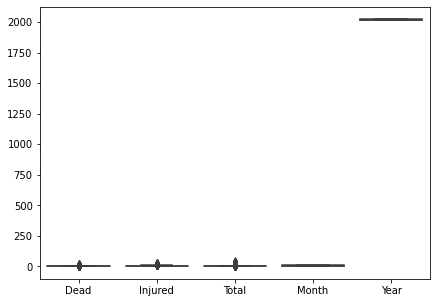

In [42]:
plt.figure(figsize = (7,5))
sns.boxplot(data= df)

**No highly unexpected outlier in the data**

<AxesSubplot:title={'center':'Null Value Count'}>

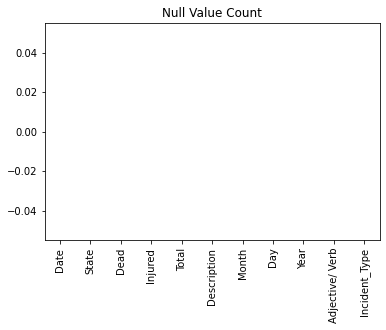

In [43]:
df.isnull().sum().plot(kind = 'bar',title = 'Null Value Count')

## Visualizing Dataset

In [44]:
totals = df.groupby(['Year','State'])['Total'].sum().unstack(level = 0).fillna(value = 0)
totals.columns.name = None

/opt/conda/lib/python3.7/site-packages/waterfall_chart.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<Figure size 360x360 with 0 Axes>

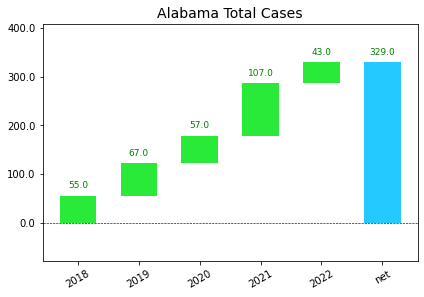

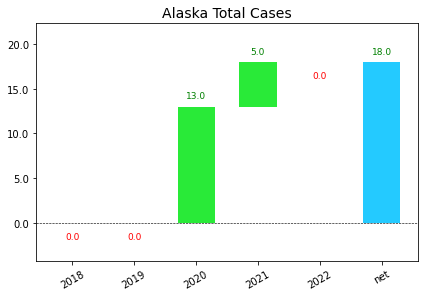

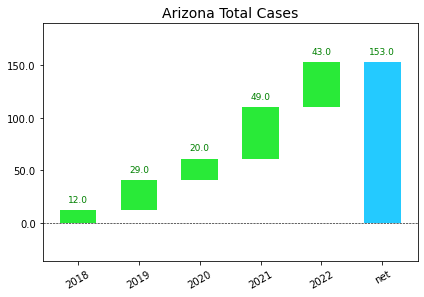

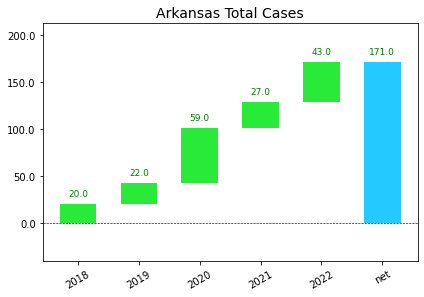

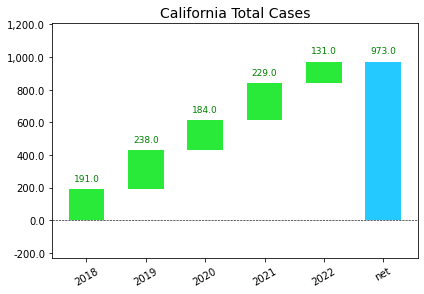

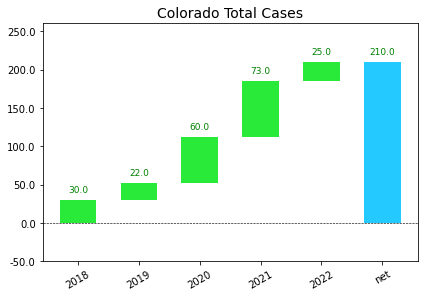

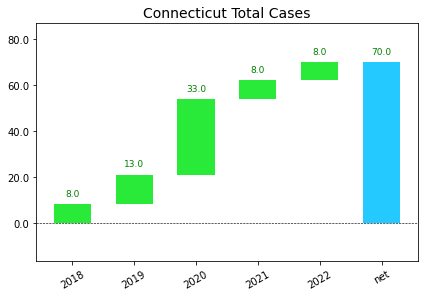

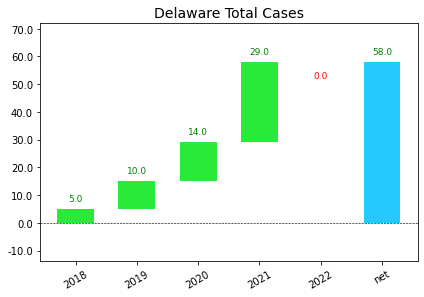

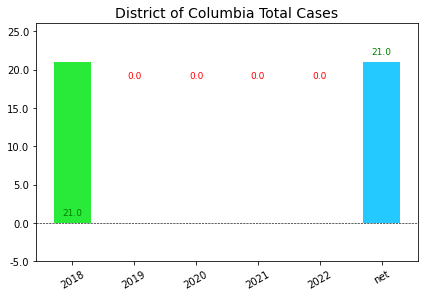

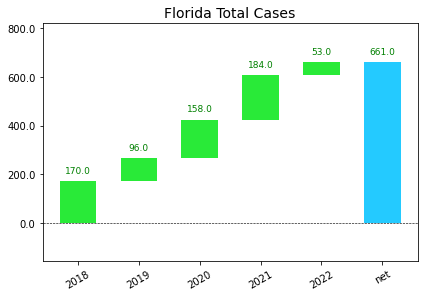

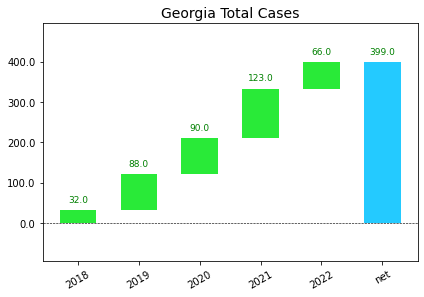

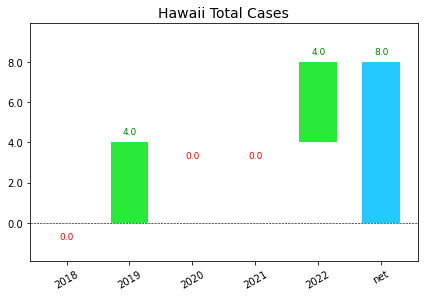

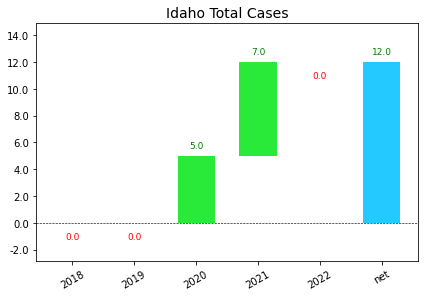

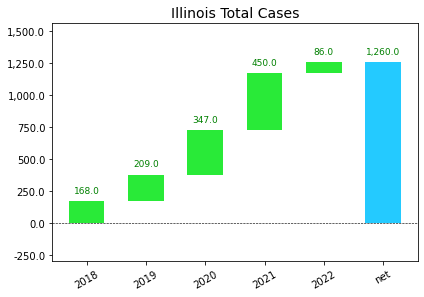

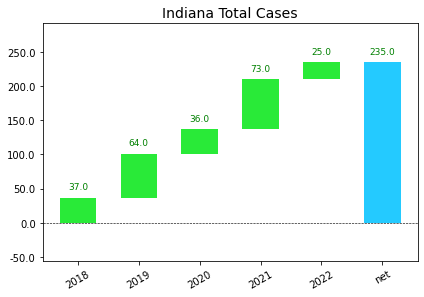

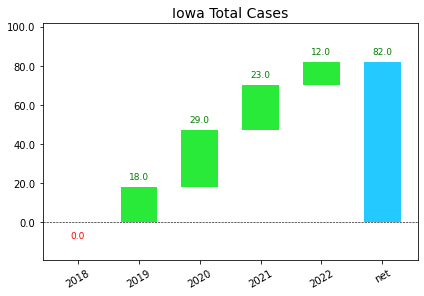

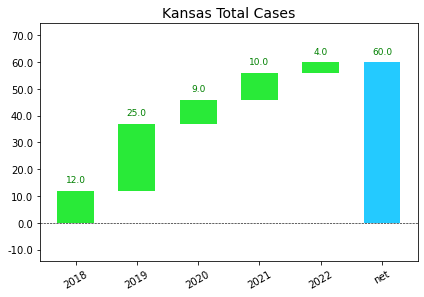

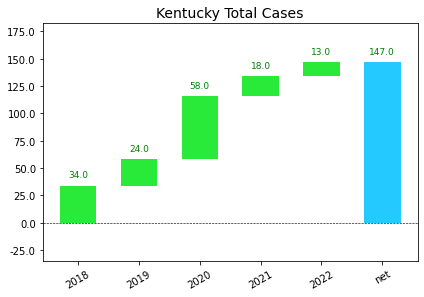

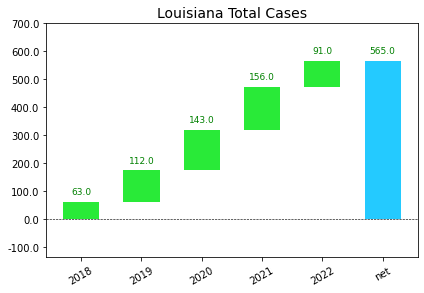

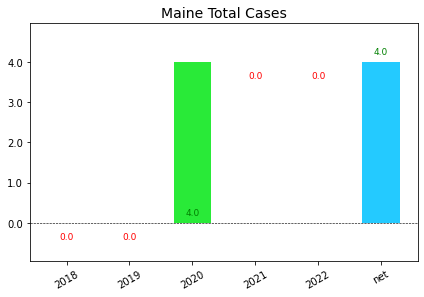

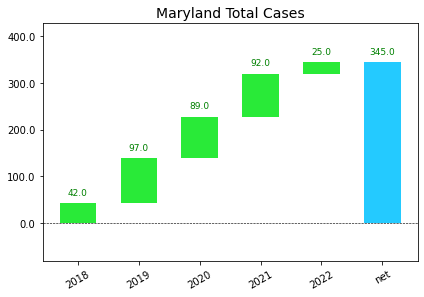

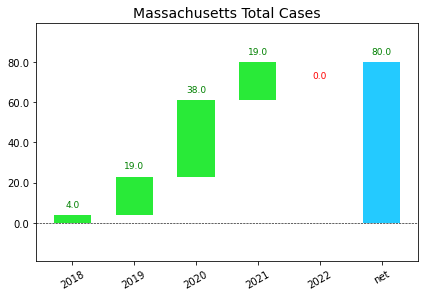

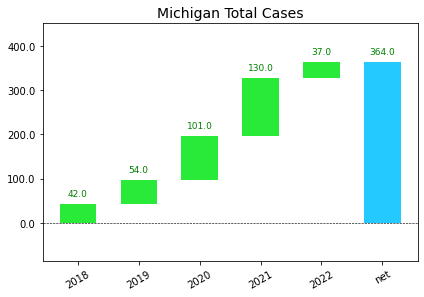

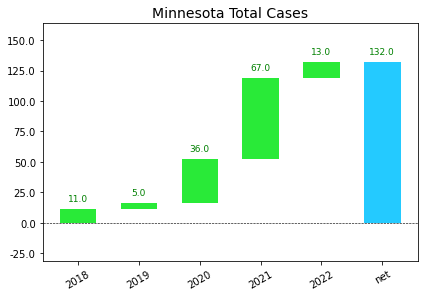

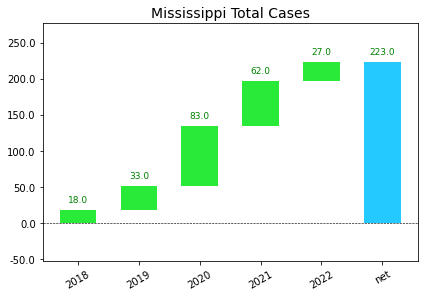

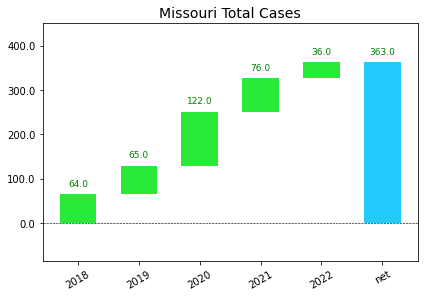

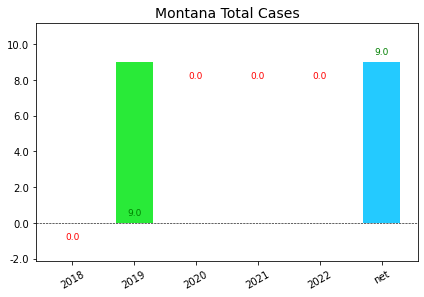

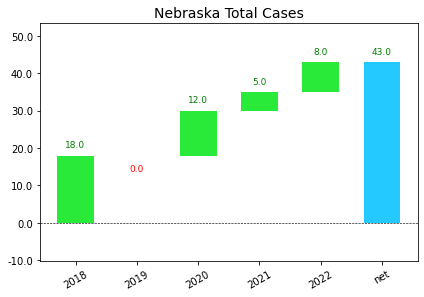

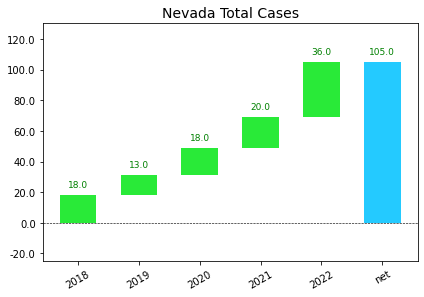

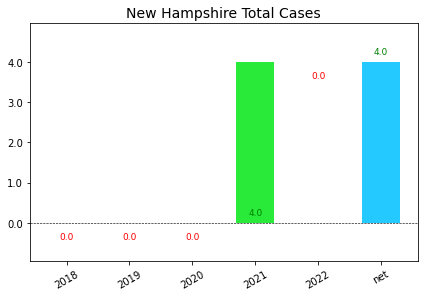

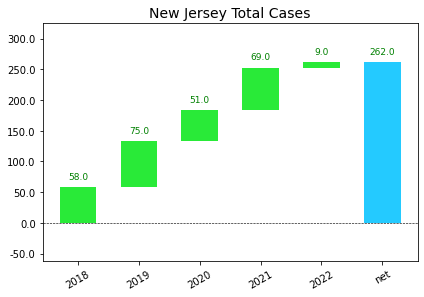

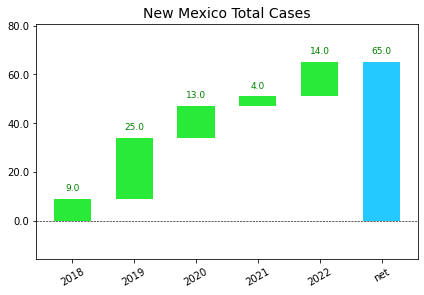

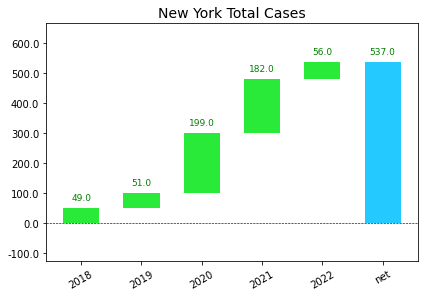

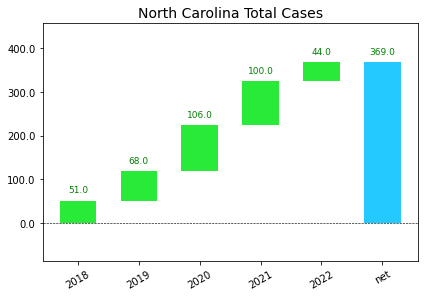

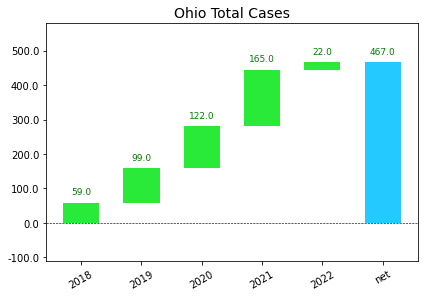

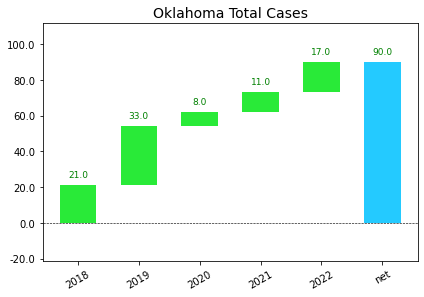

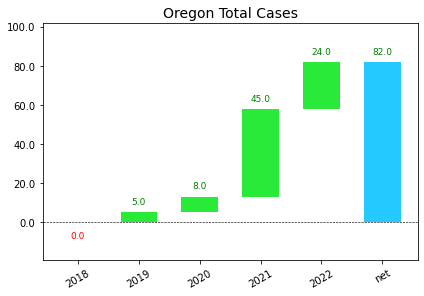

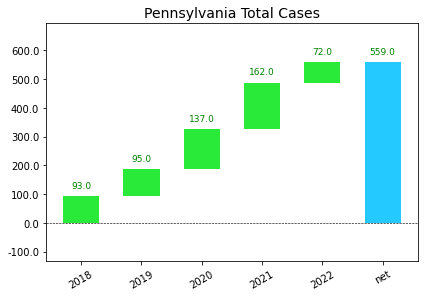

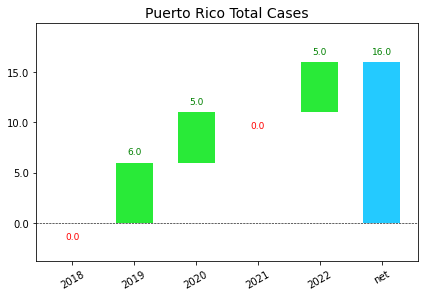

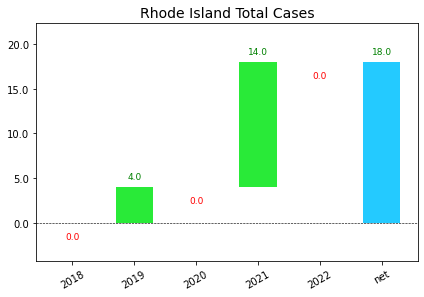

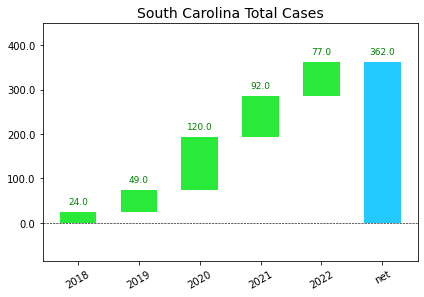

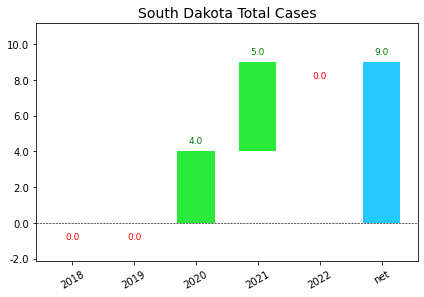

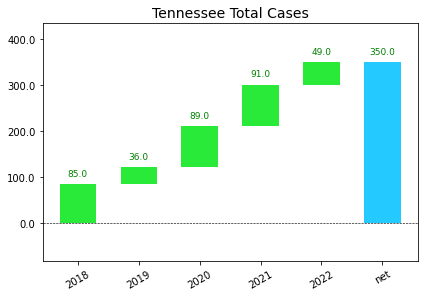

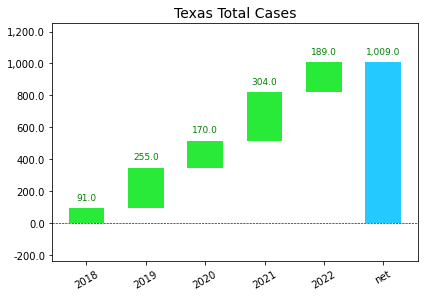

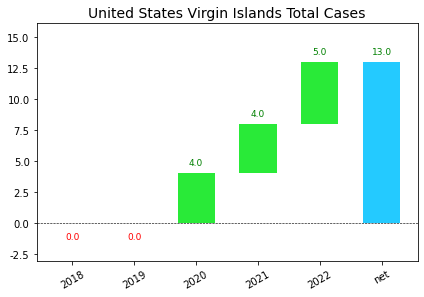

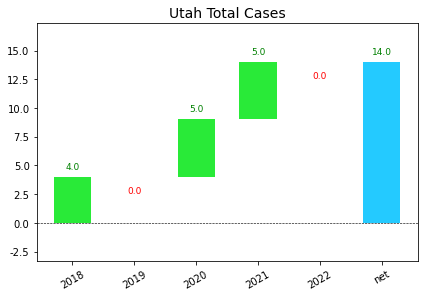

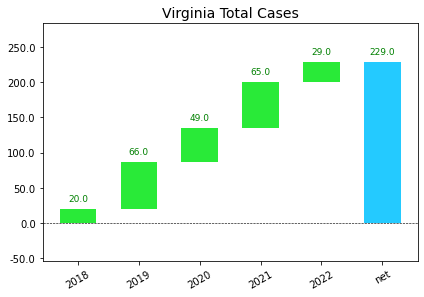

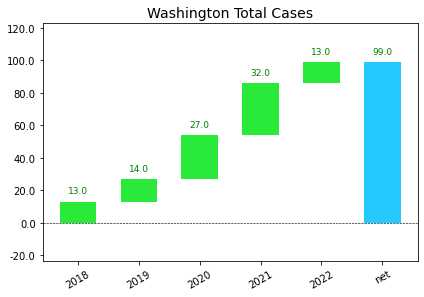

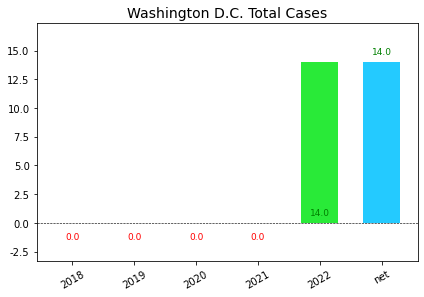

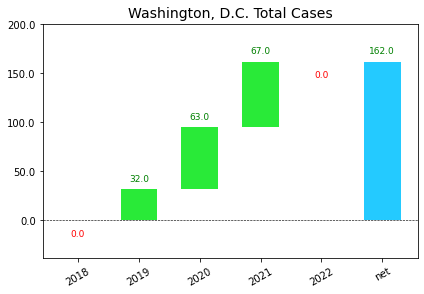

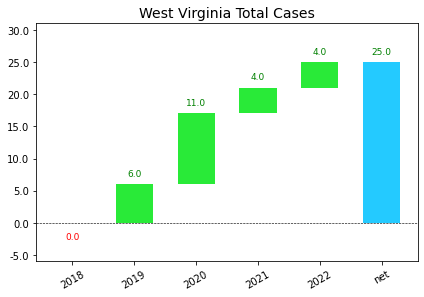

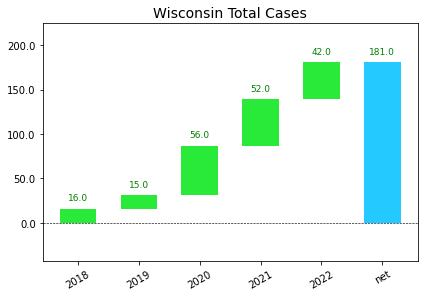

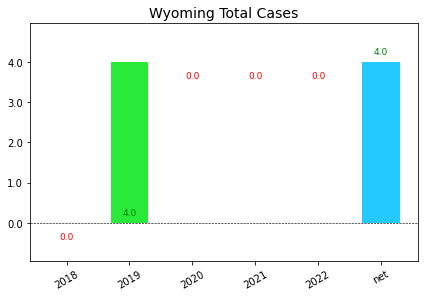

In [45]:
plt.figure(figsize = (5,5))
count = 0
for i in totals.index:
    waterfall_chart.plot(data = totals.loc[i].values,index = [str(j) for j in list(totals.loc[i].index)])
    plt.title(str(i)+' Total Cases',fontsize = 14)
    count+=1
    

### Visualizing Places with Largest and Smallest Number of Cases

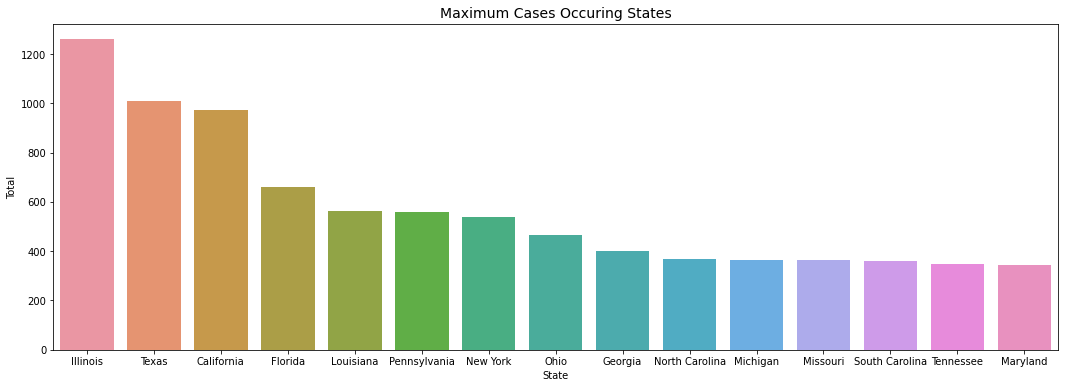

In [46]:
largest = df.groupby(['State'])['Total'].sum().reset_index().nlargest(n = 15,columns='Total')
plt.figure(figsize = (18,6))
sns.barplot(x = 'State',y = 'Total',data = largest)
plt.title('Maximum Cases Occuring States',fontsize = 14)
plt.show()

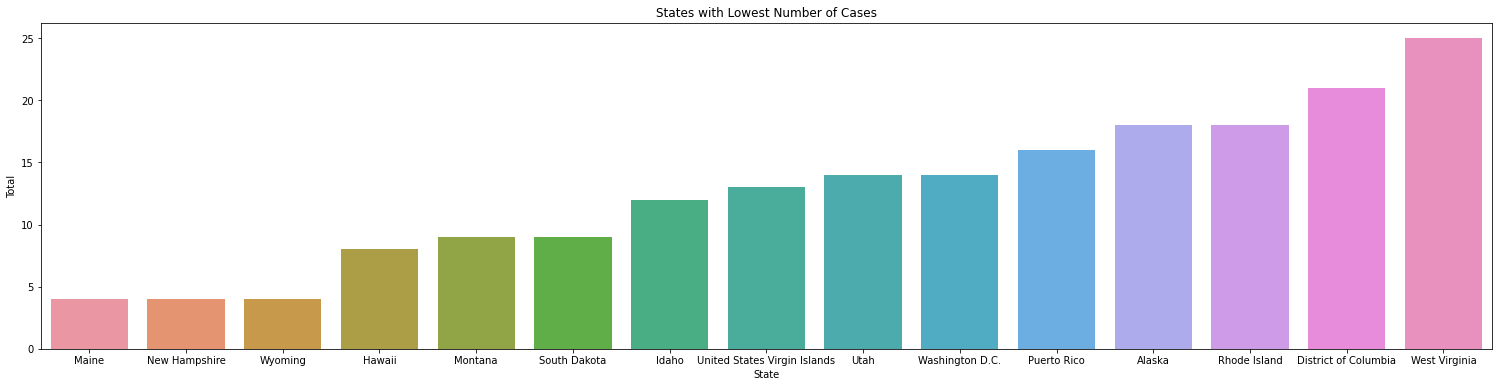

In [47]:
largest = df.groupby(['State'])['Total'].sum().reset_index().nsmallest(n = 15,columns='Total')
plt.figure(figsize = (26,6))
sns.barplot(x = 'State',y = 'Total',data = largest)
plt.title('States with Lowest Number of Cases')
plt.show()

## Change in Crime Rate Based on Days of the Week Over Years 

In [48]:
week_no = {'Sunday':1,'Monday':2,'Tuesday':3,'Wednesday':4,'Thursday':5,'Friday':6,'Saturday':7}
list(week_no.keys())

['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

In [49]:
week_based_year = df.groupby(['Day','Year'])['Total'].sum().unstack(level = 0)
week_based_year.columns.name = None
week_based_year = week_based_year[list(week_no.keys())]
week_based_year = week_based_year.transpose()
week_based_year.columns.name = None
week_based_year

,2018,2019,2020,2021,2022
Sunday,361,534,609,931,274
Monday,236,287,407,371,119
Tuesday,212,241,390,352,158
Wednesday,222,177,309,354,201
Thursday,176,255,317,426,136
Friday,164,315,339,489,265
Saturday,297,465,694,596,361


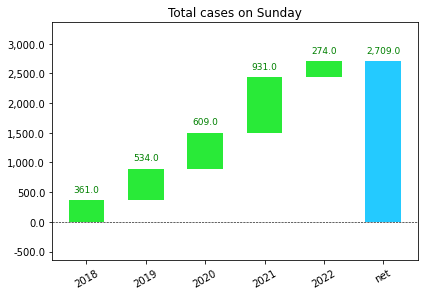

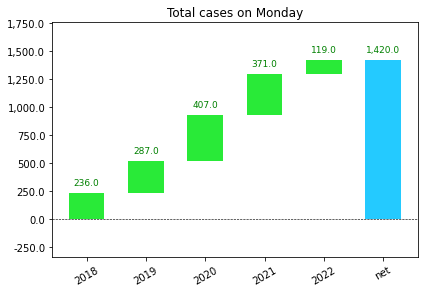

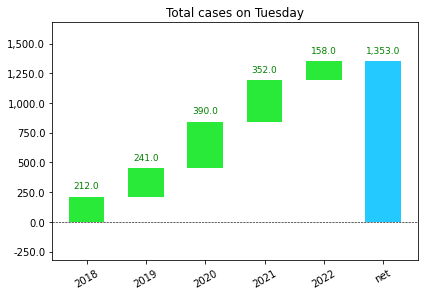

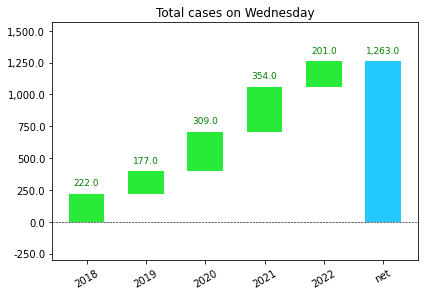

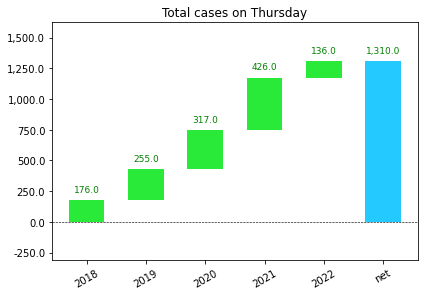

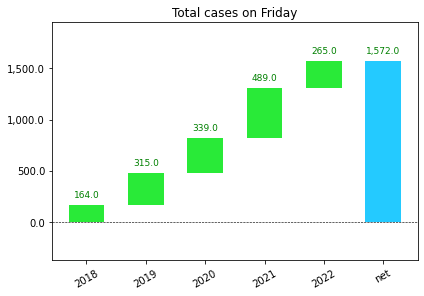

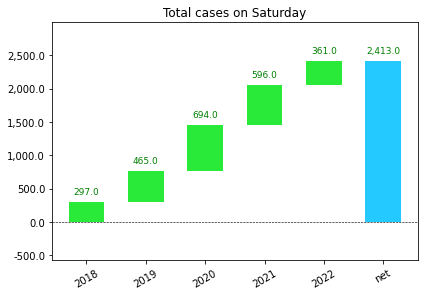

In [50]:
idx = [str(j) for j in week_based_year.columns]

for i in range(len(week_based_year)):
    val = week_based_year.iloc[i,:]
    title = week_based_year.index[i]
    waterfall_chart.plot(data = val,index = idx)
    plt.title('Total cases on '+title)
    plt.show()
    
    
    

## Analysis of Death Cases

In [51]:
death = df.groupby(['Year','State'])['Dead'].sum().unstack(level = 0)
death.columns.name = None
death.fillna(value=0,inplace=True)

<AxesSubplot:title={'center':'Death Variation'}, xlabel='State'>

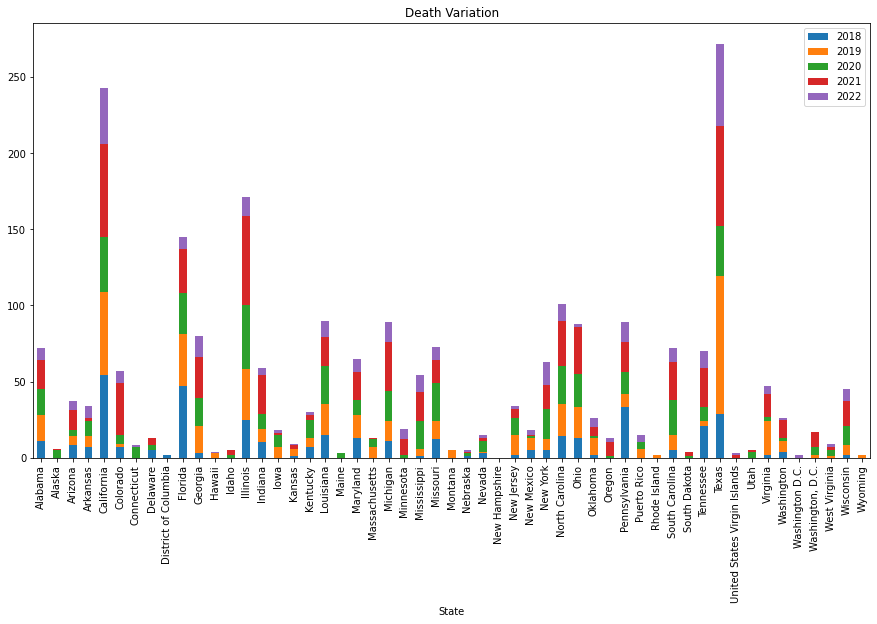

In [52]:
death.plot(kind = 'bar',stacked = True,figsize = (15,8),title = 'Death Variation',fontsize = 10)

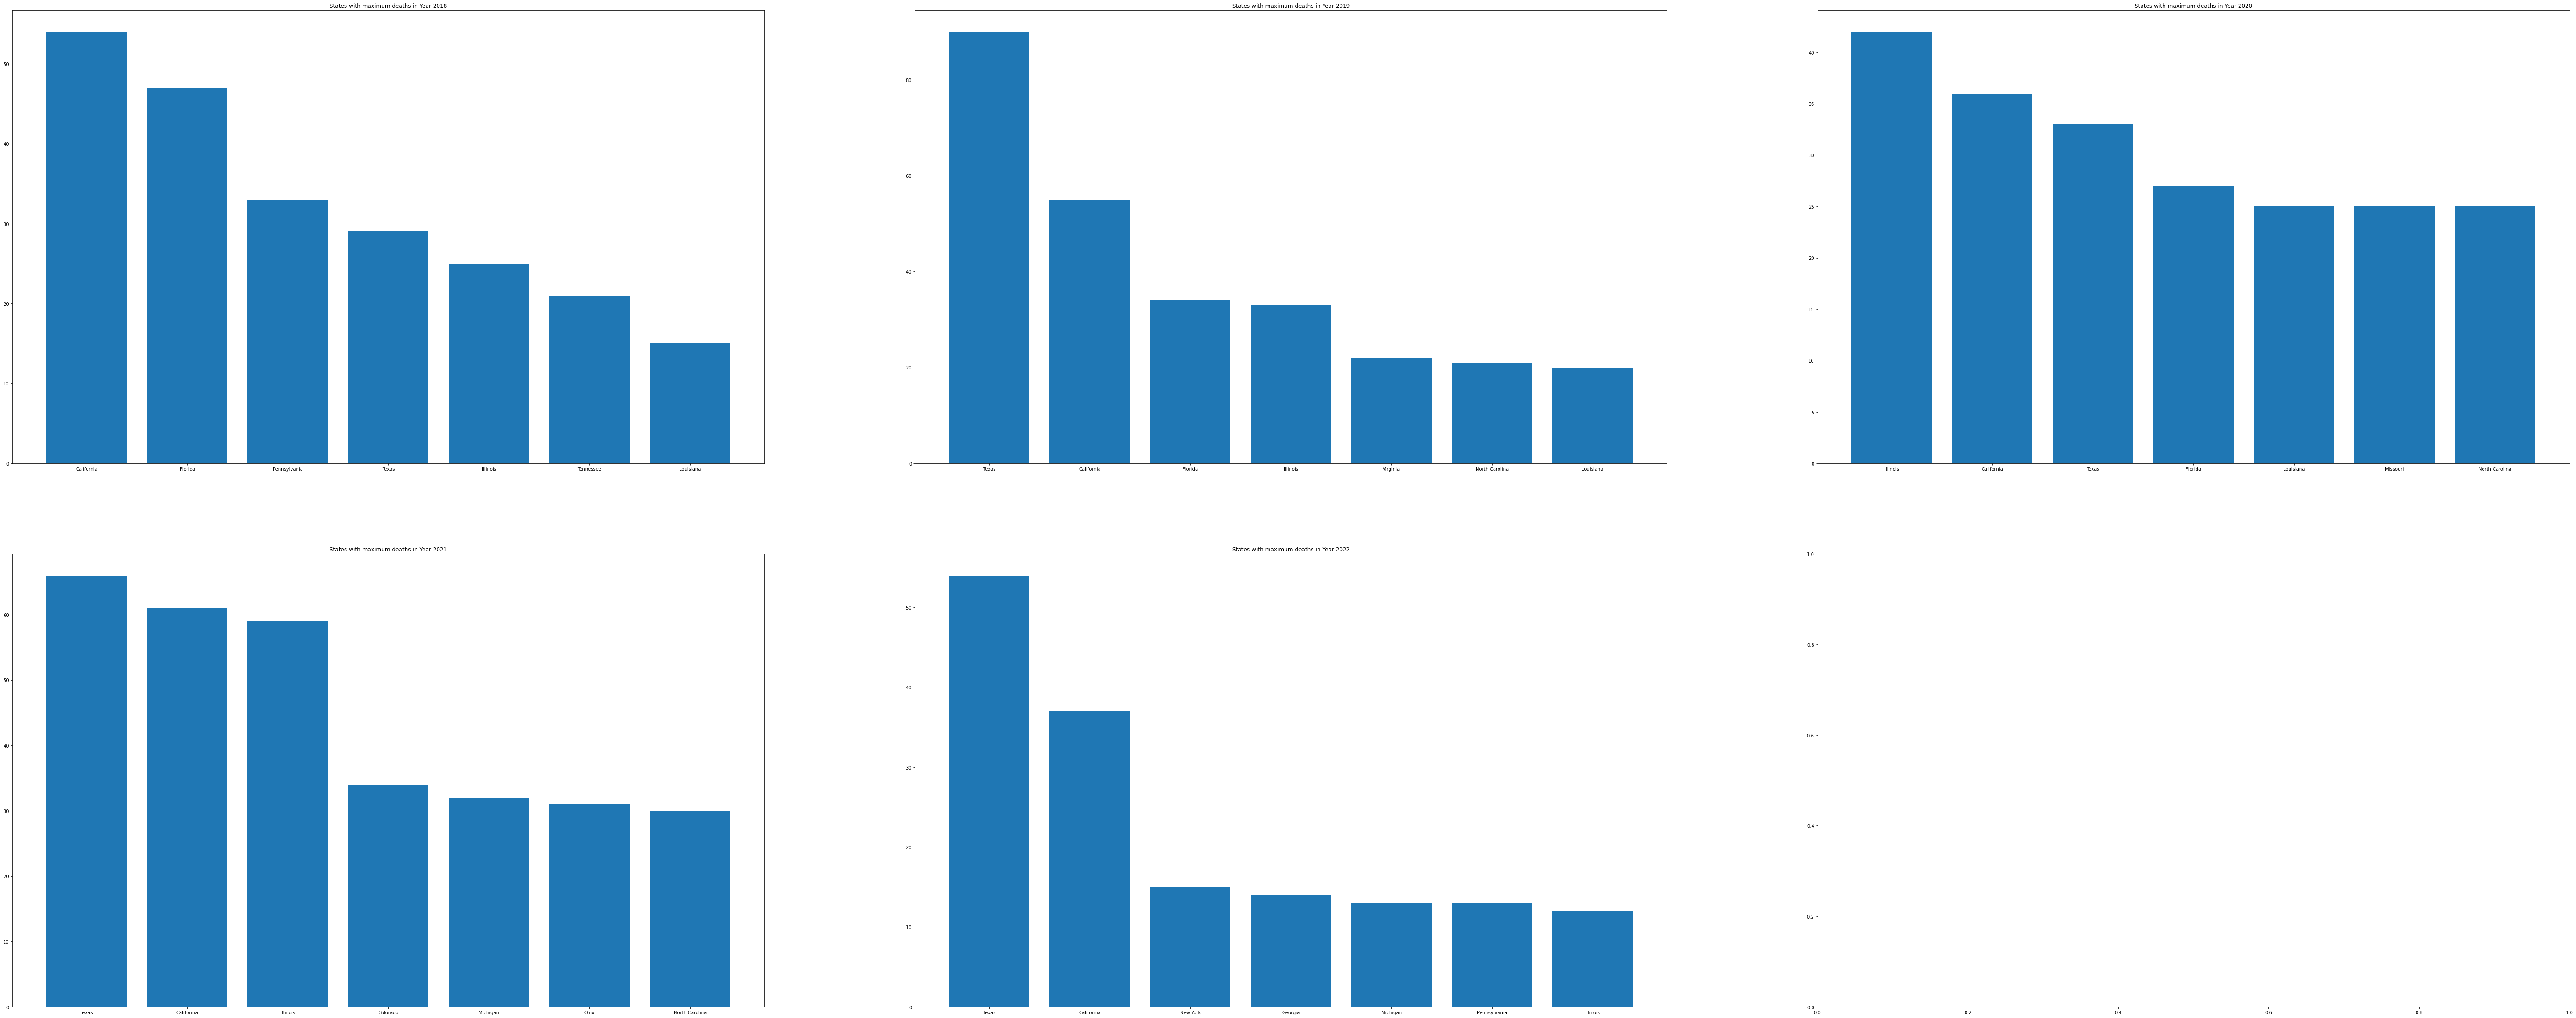

In [53]:

fig,ax = plt.subplots(nrows= 2,ncols=3,figsize = (100,40))
ax = ax.ravel()
count = 0

for i in death.columns:
    data = death[i].nlargest(7)
    ax[count].bar(height = data.values,x = data.index)
    ax[count].set_title('States with maximum deaths in Year '+str(i))
    count+=1
    

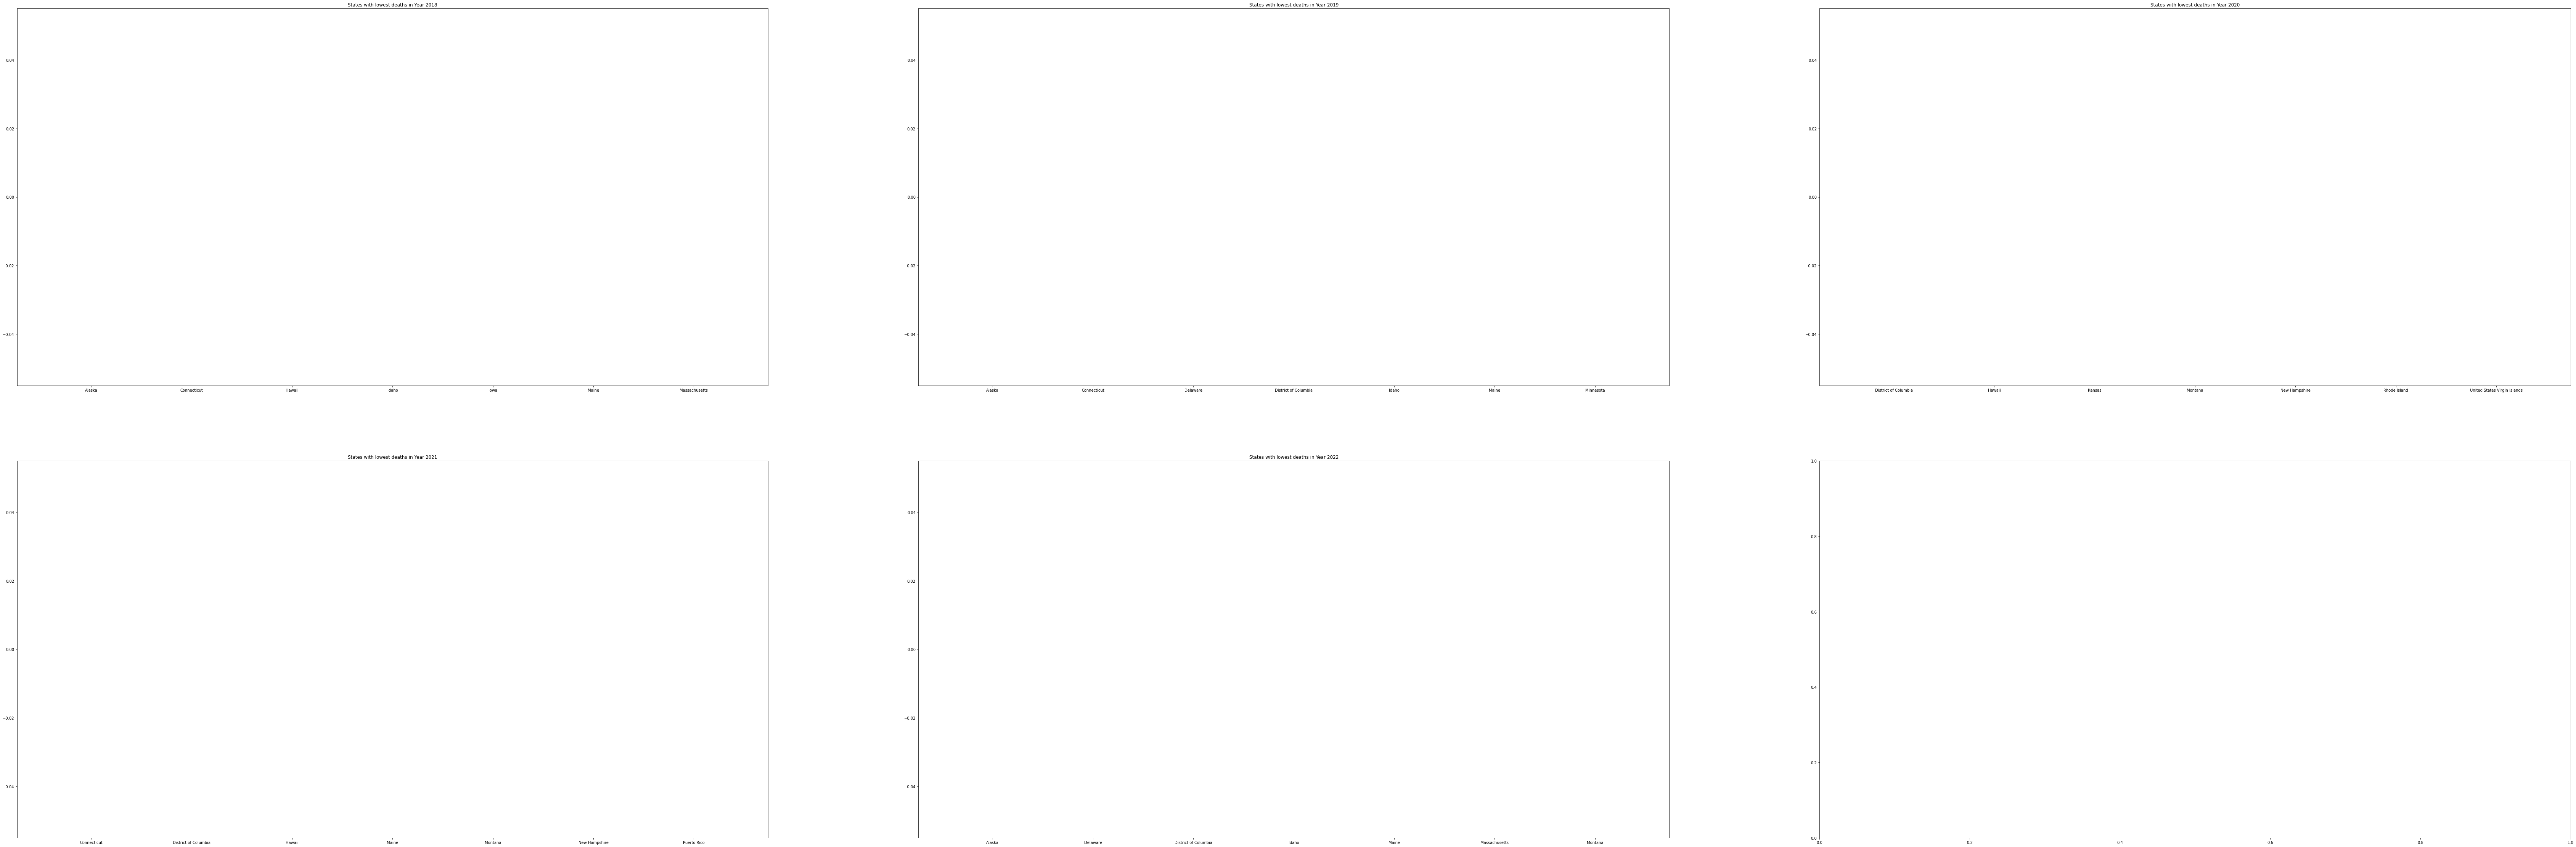

In [54]:
fig,ax = plt.subplots(nrows= 2,ncols=3,figsize = (120,40))
ax = ax.ravel()
count = 0

for i in death.columns:
    data = death[i].nsmallest(7)
    ax[count].bar(height = data.values,x = data.index)
    ax[count].set_title('States with lowest deaths in Year '+str(i))
    count+=1
    

In [55]:
geolocate = Nominatim(timeout=1,user_agent='myGeolocator')
def long_lat(address):
    try:
        loc = geolocate.geocode(address)
        coo_long,coo_lat = loc.longitude,loc.latitude
        return coo_long,coo_lat
    except:
        print(f'{address} not found')
        coo_long,coo_lat = None, None
        return coo_long,coo_lat
    
       


In [56]:
death['Longitude'], death['Latitude'] = zip(*death.reset_index()['State'].apply(lambda x: long_lat(x)))

In [57]:
def rgb_to_hex(rgb):
    return '%02x%02x%02x' % rgb

In [58]:
#USA Co-ordinates: 37.0902° N, 95.7129° W
import folium
m = folium.Map(location=[37,-95],tiles='cartodb positron',zoom_start=3)
for i in death.index:
    d = death.loc[i]
    v = d.index[:-2]
    for j in v:
        
        color1 = '#'+rgb_to_hex((np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)))
        #color2 = '#'+rgb_to_hex((np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)))
        folium.Circle(location = [d['Latitude'],d['Longitude']],
                 radius = d[j]*250,popup= i+' '+str(j)+' '+ str(d[j]),color = color1).add_to(m)

m     

### Analysis of Death Cases Based on Day of the Week

In [59]:
death_day = df.groupby(['Day','State'])['Dead'].sum().unstack(level = 0)
death_day.columns.name = None
death_day.fillna(value=0,inplace=True)


<AxesSubplot:title={'center':'Death Variation'}, xlabel='State'>

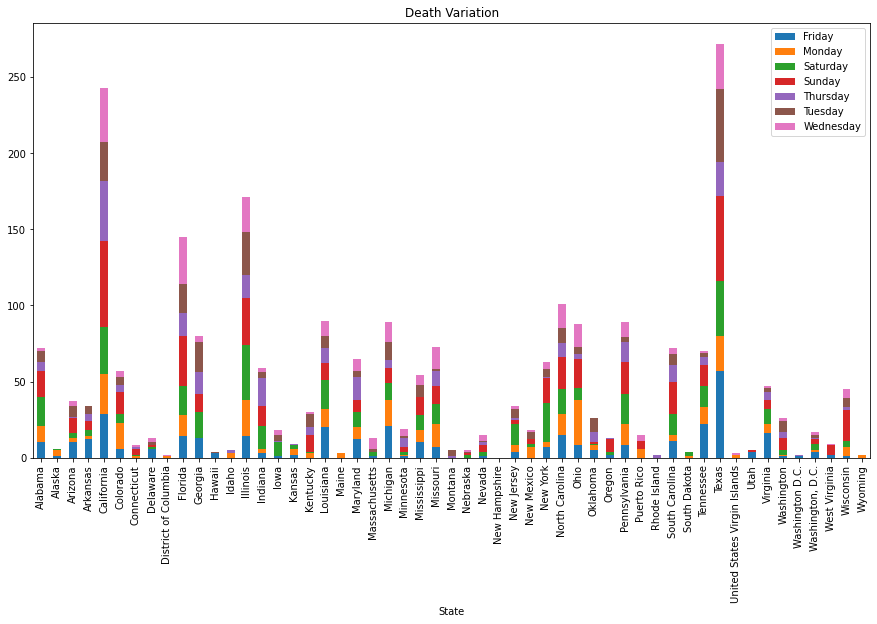

In [60]:
death_day.plot(kind = 'bar',stacked = True,figsize = (15,8),title = 'Death Variation',fontsize = 10)

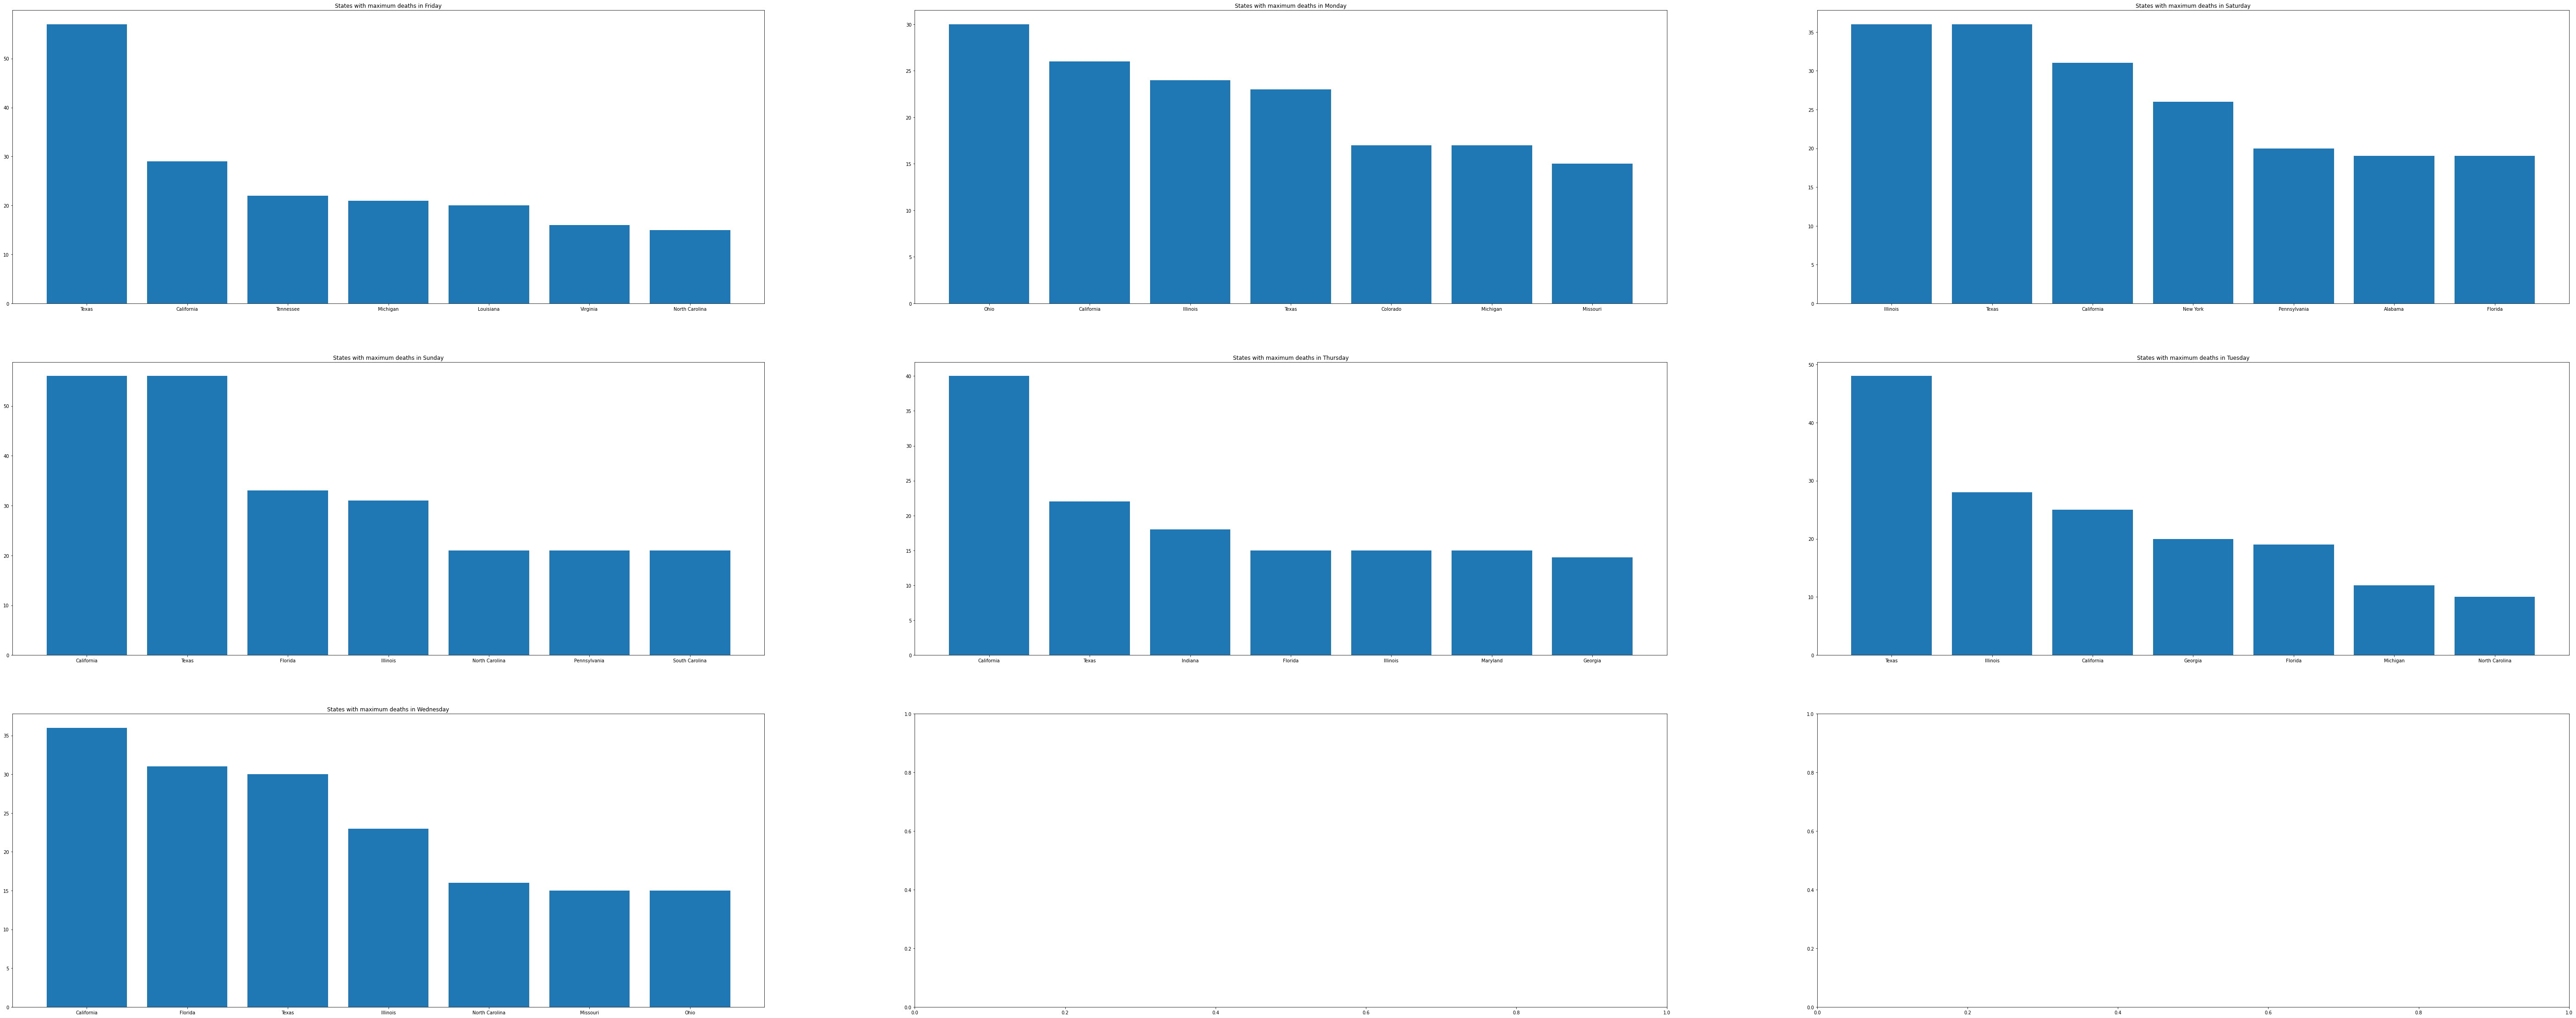

In [61]:

fig,ax = plt.subplots(nrows= 3,ncols=3,figsize = (100,40))
ax = ax.ravel()
count = 0

for i in death_day.columns:
    data = death_day[i].nlargest(7)
    ax[count].bar(height = data.values,x = data.index)
    ax[count].set_title('States with maximum deaths in '+str(i))
    count+=1
    

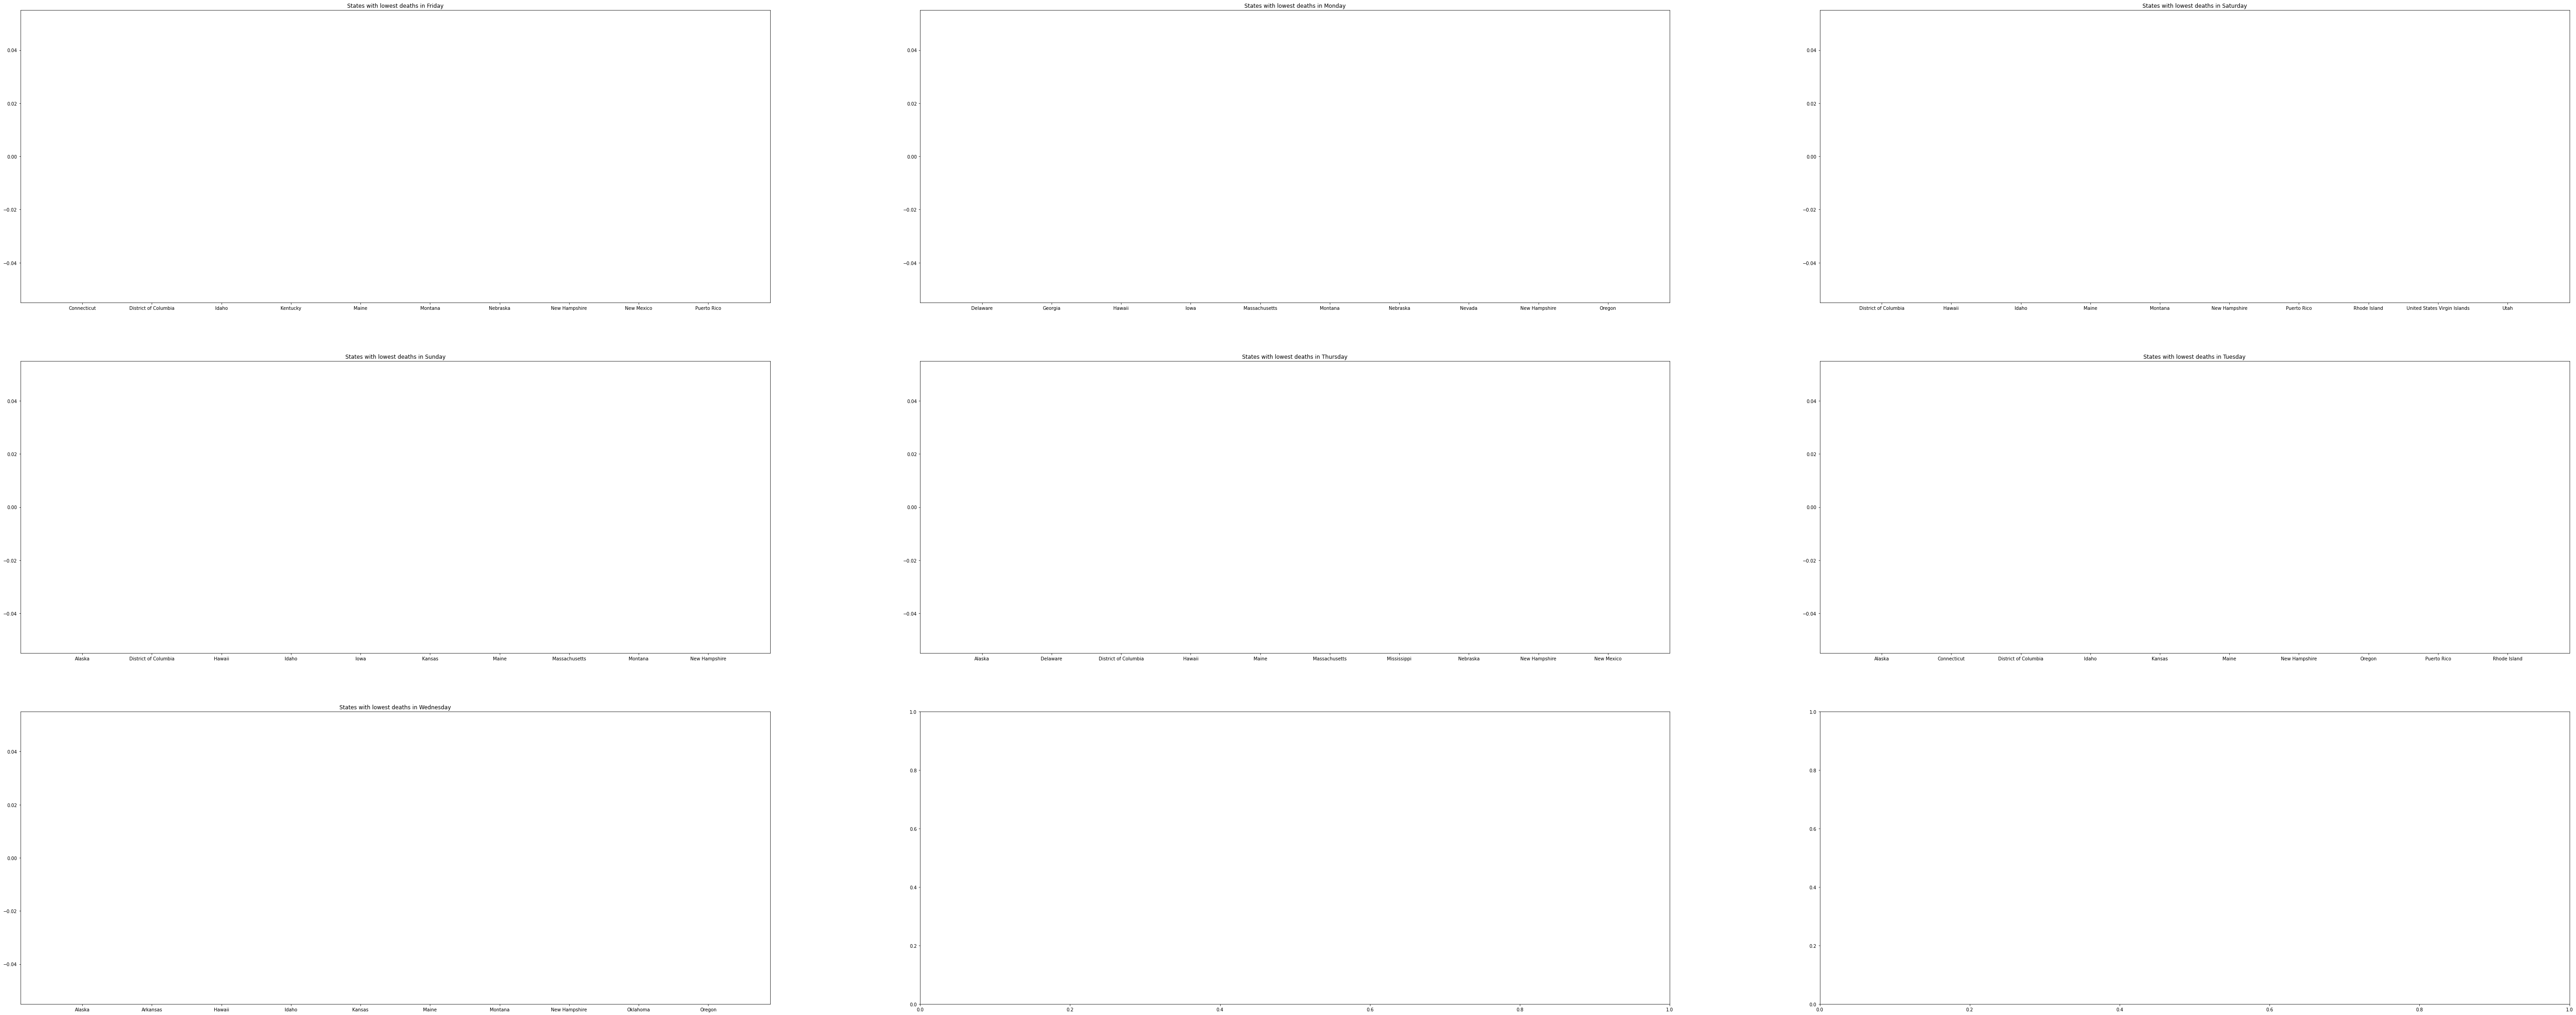

In [62]:
fig,ax = plt.subplots(nrows= 3,ncols=3,figsize = (100,40))
ax = ax.ravel()
count = 0

for i in death_day.columns:
    data = death_day[i].nsmallest(10)
    ax[count].bar(height = data.values,x = data.index)
    ax[count].set_title('States with lowest deaths in '+str(i))
    count+=1
    

In [63]:
death_day['Longitude'], death_day['Latitude'] = zip(*death_day.reset_index()['State'].apply(lambda x: long_lat(x)))

In [64]:
#USA Co-ordinates: 37.0902° N, 95.7129° W
import folium
m = folium.Map(location=[37,-95],tiles='cartodb positron',zoom_start=3)
for i in death_day.index:
    d = death_day.loc[i]
    v = d.index[:-2]
    for j in v:
        
        color1 = '#'+rgb_to_hex((np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)))
        #color2 = '#'+rgb_to_hex((np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)))
        folium.Circle(location = [d['Latitude'],d['Longitude']],
                 radius = d[j]*250,popup= i+' '+str(j)+' '+ str(d[j]),color = color1).add_to(m)

m     

## Analysis of Injuries

In [65]:
injury = df.groupby(['Year','State'])['Injured'].sum().unstack(level = 0)
injury.columns.name = None
injury.fillna(value=0,inplace=True)

<AxesSubplot:title={'center':'Injury Variation'}, xlabel='State'>

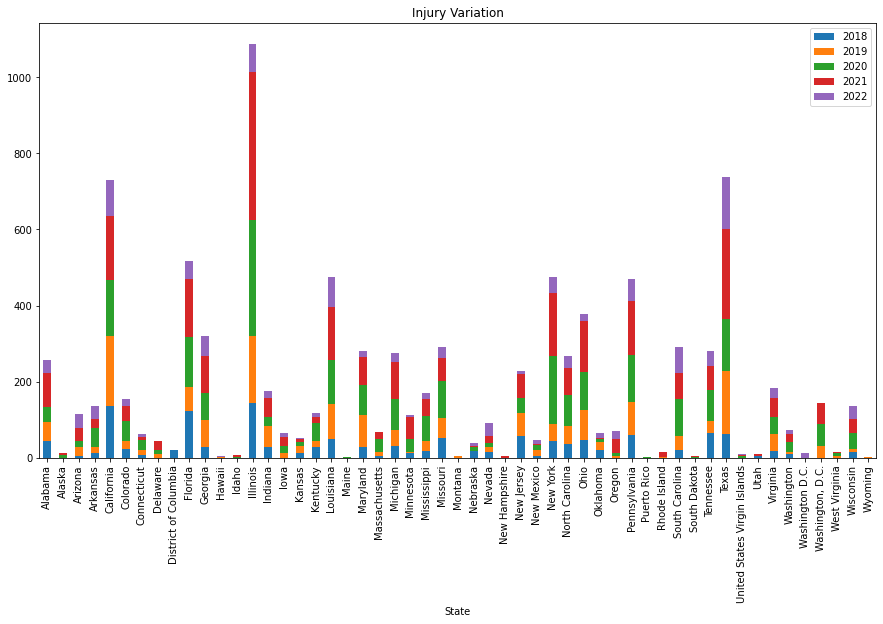

In [66]:
injury.plot(kind = 'bar',stacked = True,figsize = (15,8),title = 'Injury Variation',fontsize = 10)

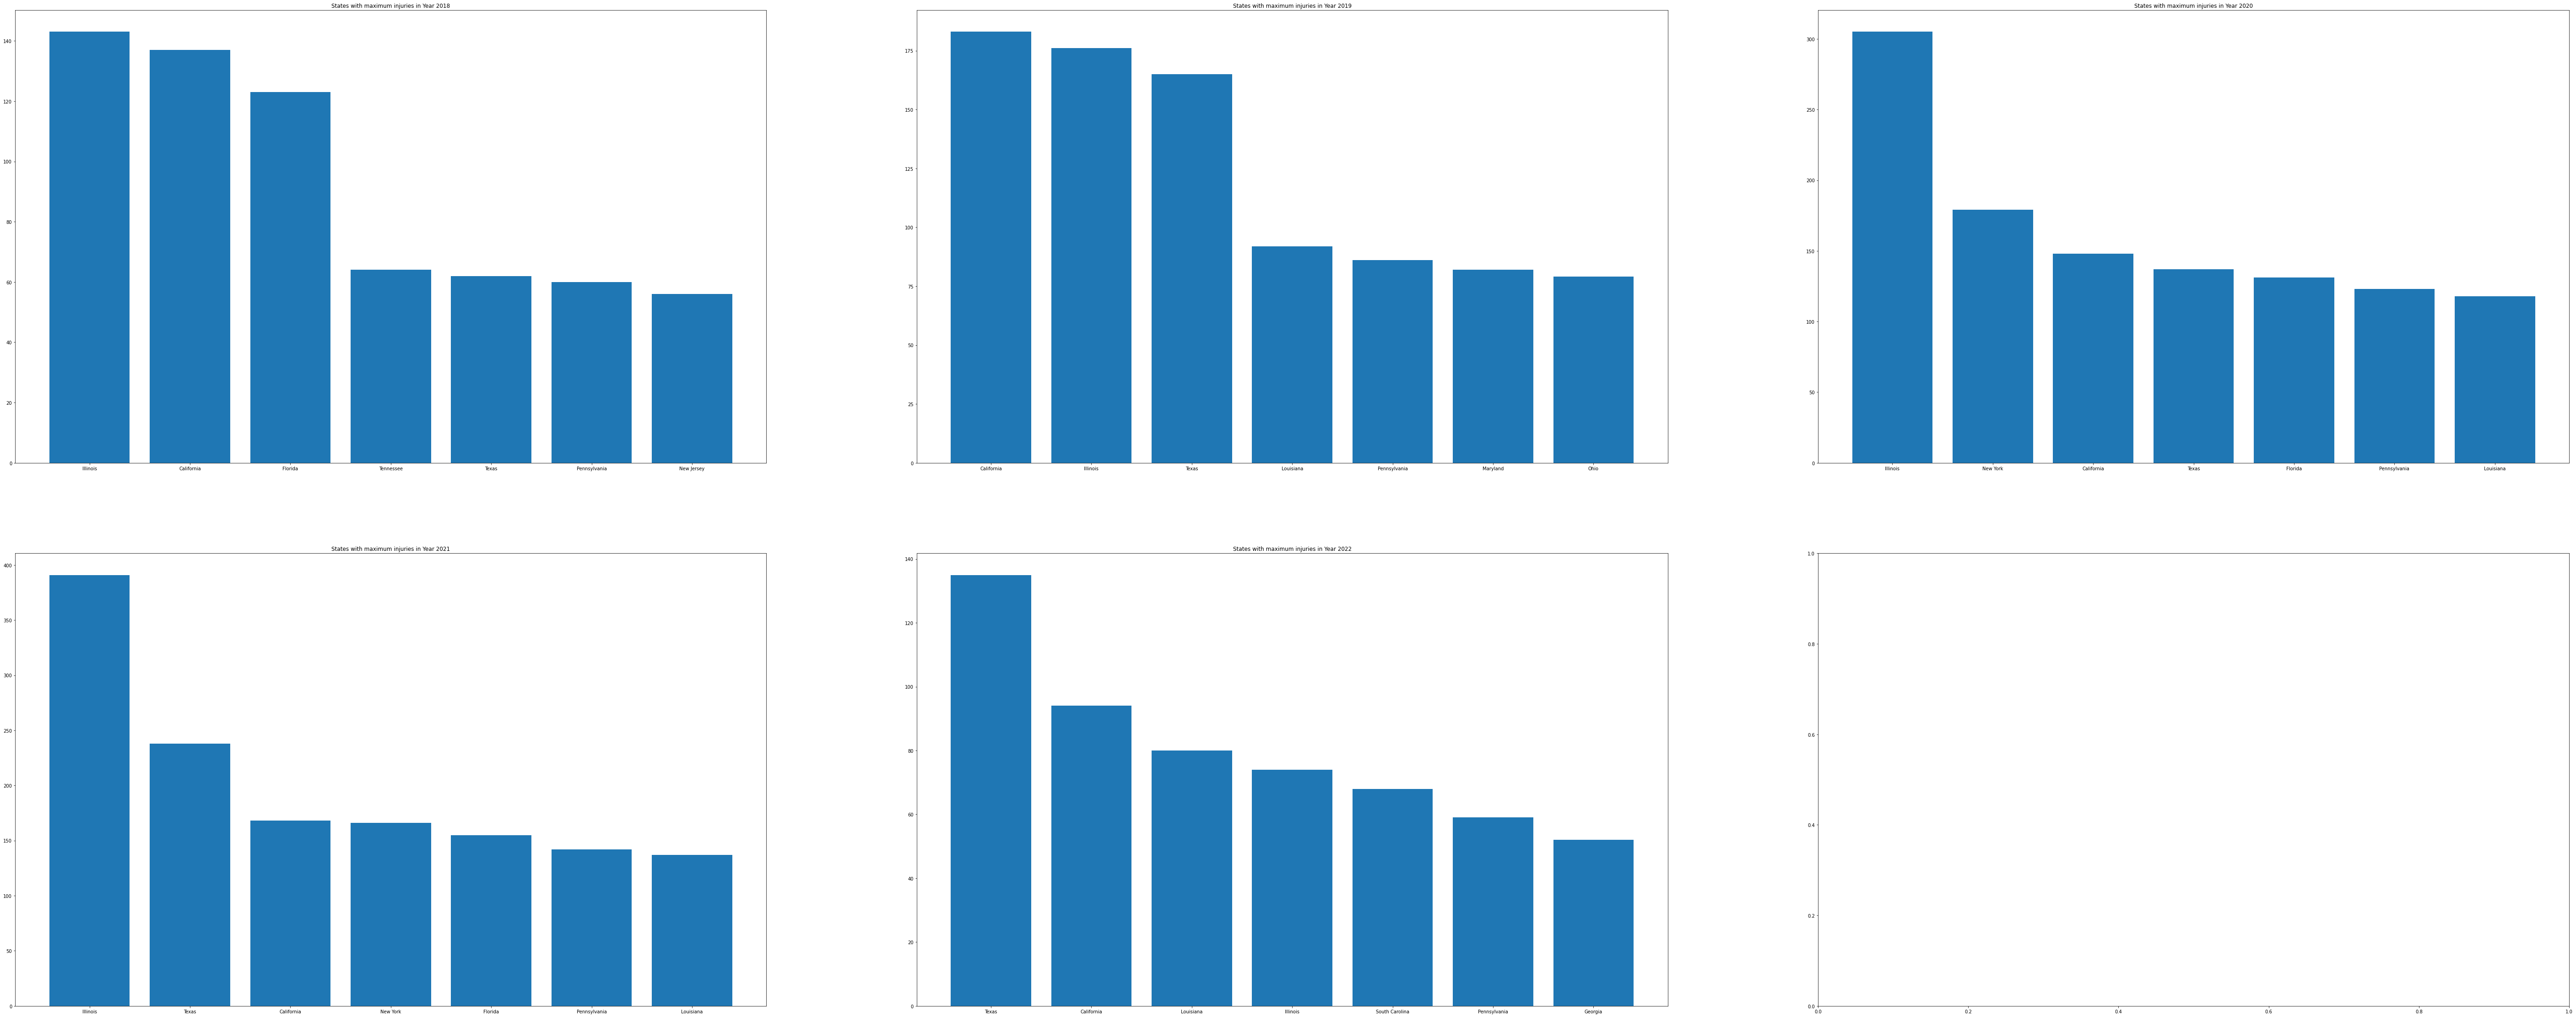

In [67]:

fig,ax = plt.subplots(nrows= 2,ncols=3,figsize = (100,40))
ax = ax.ravel()
count = 0

for i in injury.columns:
    data = injury[i].nlargest(7)
    ax[count].bar(height = data.values,x = data.index)
    ax[count].set_title('States with maximum injuries in Year '+str(i))
    count+=1
    

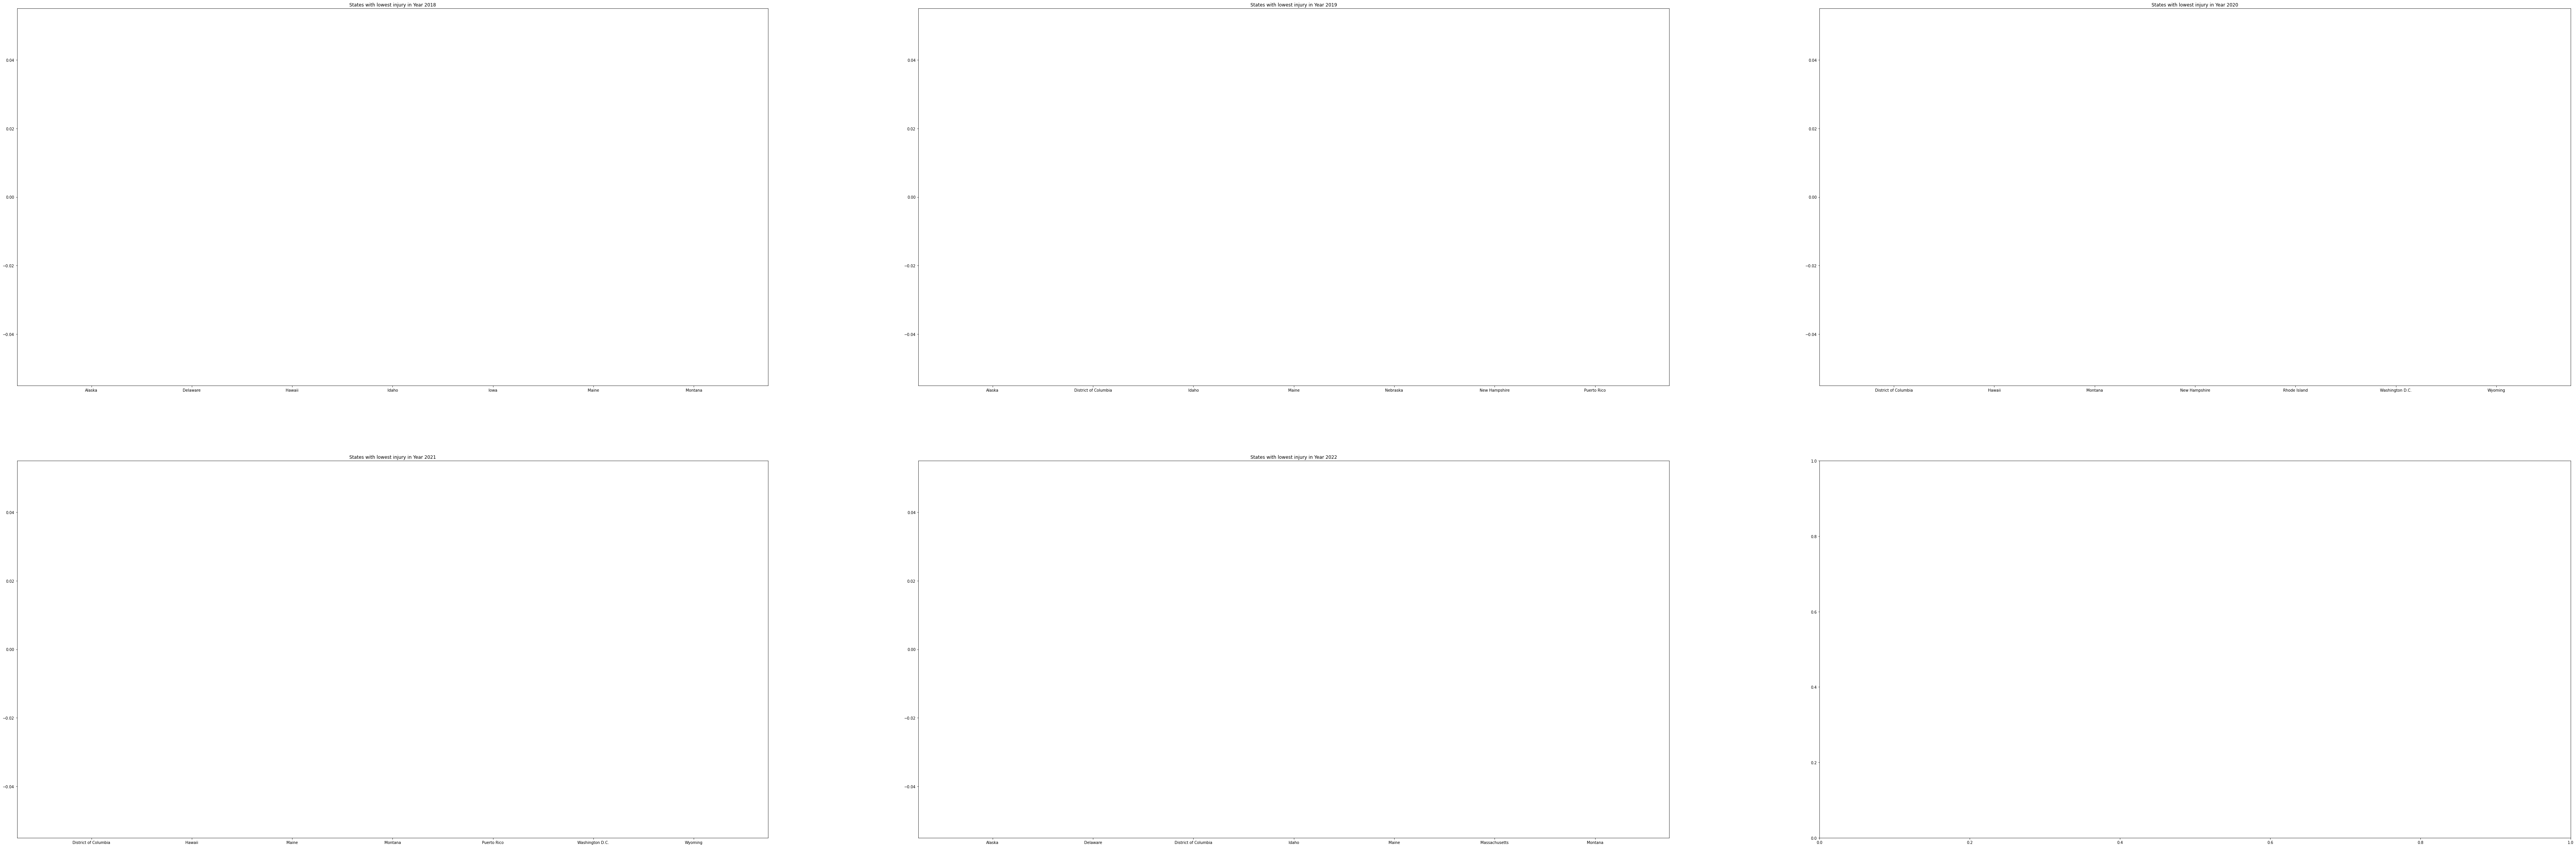

In [68]:
fig,ax = plt.subplots(nrows= 2,ncols=3,figsize = (120,40))
ax = ax.ravel()
count = 0

for i in injury.columns:
    data = injury[i].nsmallest(7)
    ax[count].bar(height = data.values,x = data.index)
    ax[count].set_title('States with lowest injury in Year '+str(i))
    count+=1
    

In [69]:
injury['Longitude'], injury['Latitude'] = zip(*injury.reset_index()['State'].apply(lambda x: long_lat(x)))

In [70]:
#USA Co-ordinates: 37.0902° N, 95.7129° W

m = folium.Map(location=[37,-95],tiles='cartodb positron',zoom_start=3)
for i in injury.index:
    d = injury.loc[i]
    v = d.index[:-2]
    for j in v:
        color1 = '#'+rgb_to_hex((np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)))
        #color2 = '#'+rgb_to_hex((np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)))
        folium.Circle(location = [d['Latitude'],d['Longitude']],
                 radius = d[j]*250,popup= i+' '+str(j)+' '+ str(d[j]),color = color1).add_to(m)
m     

### Analysis of Injury Based on Day of Week 

In [71]:
injury_day = df.groupby(['Day','State'])['Injured'].sum().unstack(level = 0)
injury_day.columns.name = None
injury_day.fillna(value=0,inplace=True)


<AxesSubplot:title={'center':'Injury Variation'}, xlabel='State'>

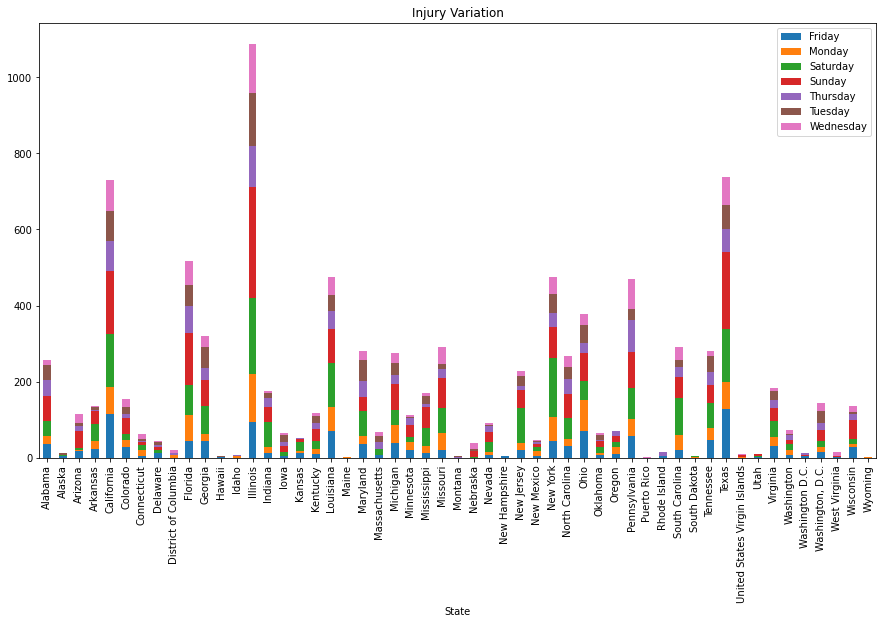

In [72]:
injury_day.plot(kind = 'bar',stacked = True,figsize = (15,8),title = 'Injury Variation',fontsize = 10)

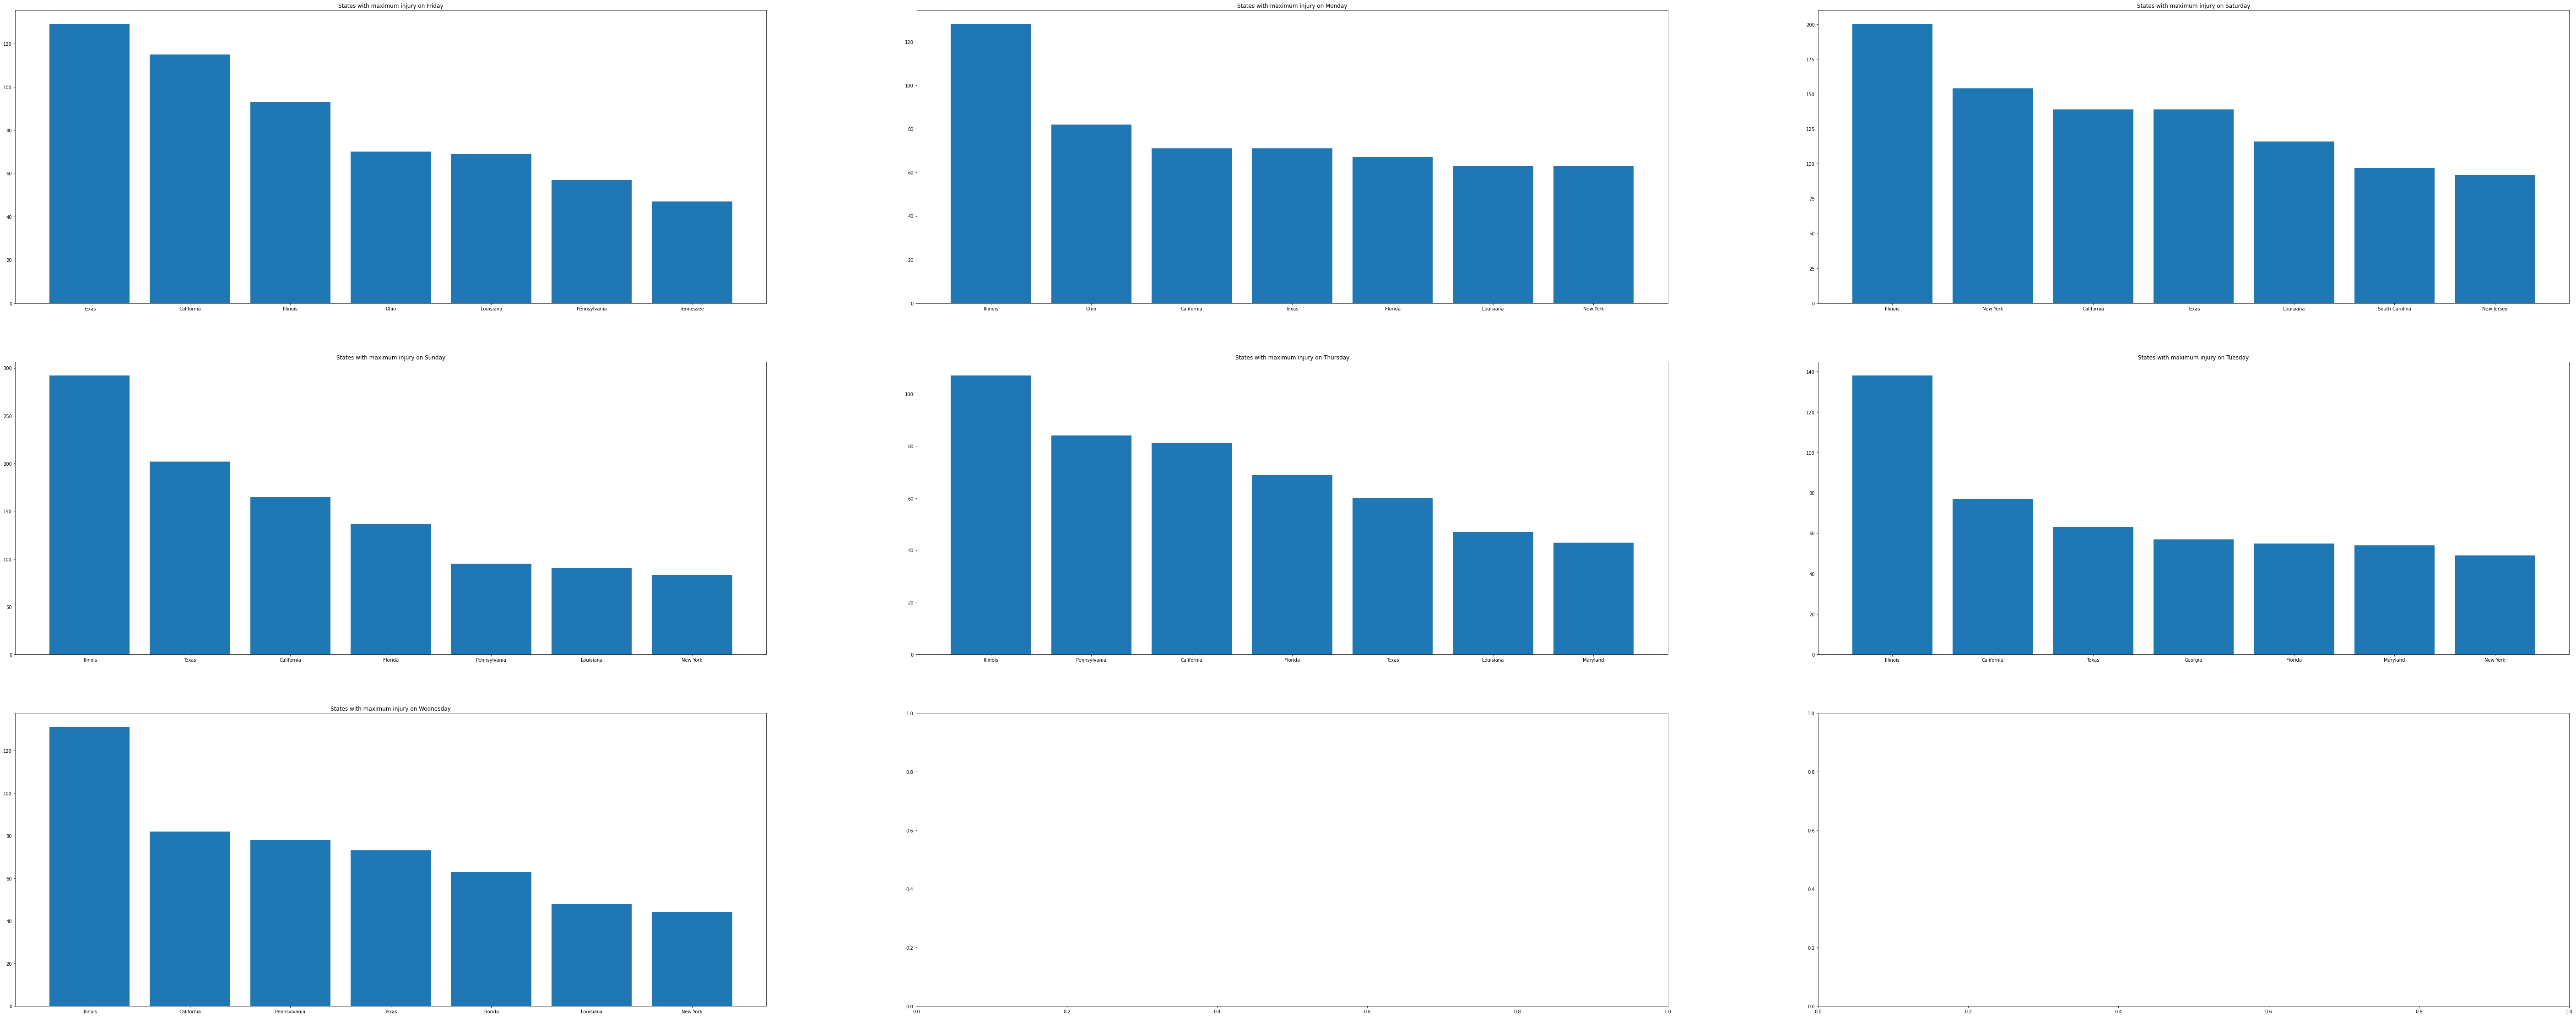

In [73]:

fig,ax = plt.subplots(nrows= 3,ncols=3,figsize = (100,40))
ax = ax.ravel()
count = 0

for i in injury_day.columns:
    data = injury_day[i].nlargest(7)
    ax[count].bar(height = data.values,x = data.index)
    ax[count].set_title('States with maximum injury on '+str(i))
    count+=1
    

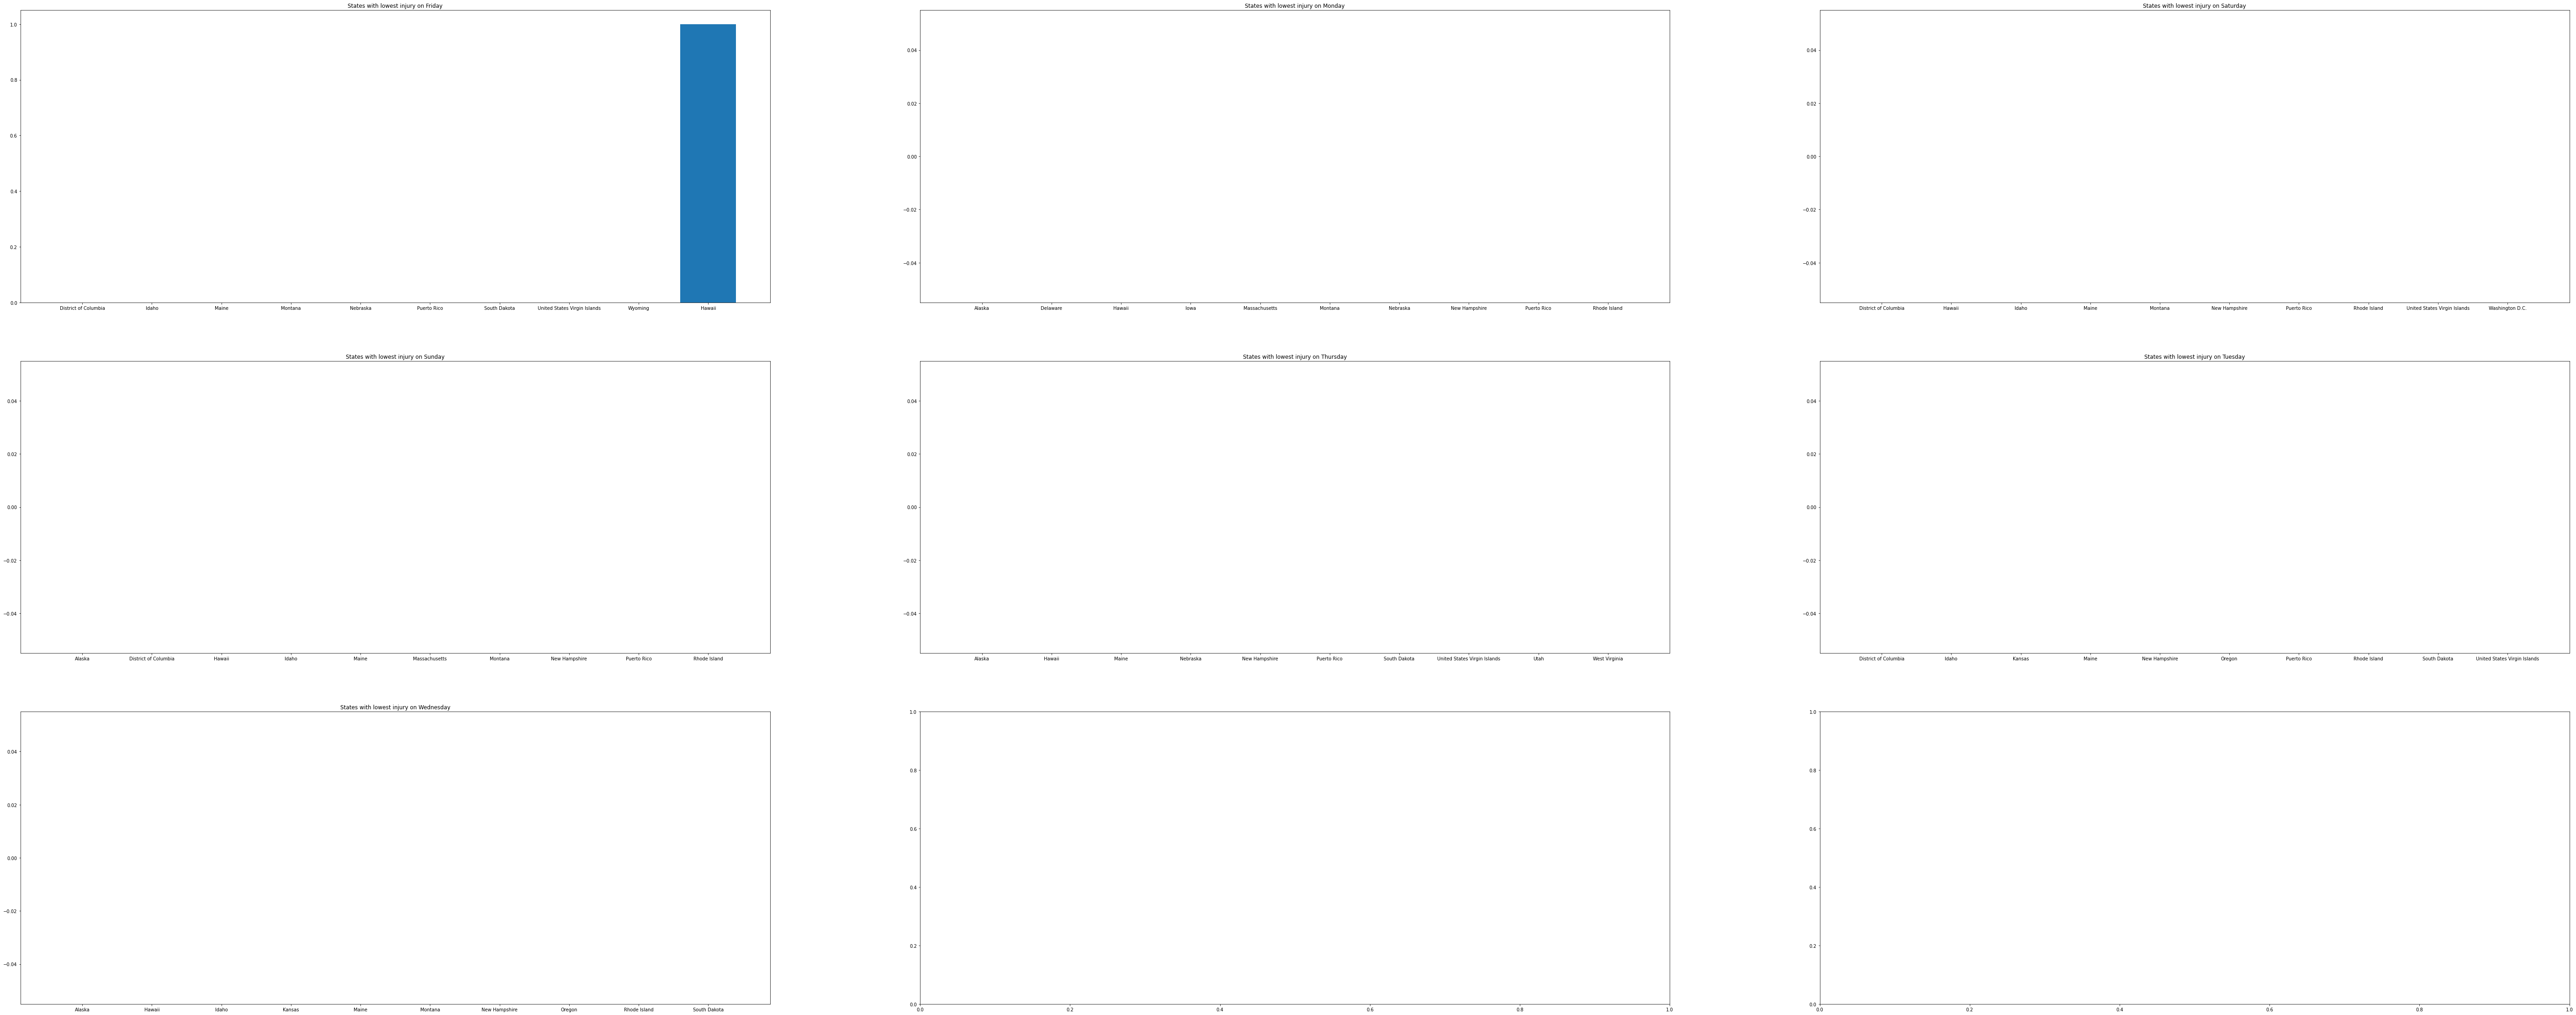

In [74]:
fig,ax = plt.subplots(nrows= 3,ncols=3,figsize = (100,40))
ax = ax.ravel()
count = 0

for i in injury_day.columns:
    data = injury_day[i].nsmallest(10)
    ax[count].bar(height = data.values,x = data.index)
    ax[count].set_title('States with lowest injury on '+str(i))
    count+=1
    

In [75]:
injury_day['Longitude'], injury_day['Latitude'] = zip(*injury_day.reset_index()['State'].apply(lambda x: long_lat(x)))

In [76]:
#USA Co-ordinates: 37.0902° N, 95.7129° W
import folium
m = folium.Map(location=[37,-95],tiles='cartodb positron',zoom_start=3)
for i in injury_day.index:
    d = injury_day.loc[i]
    v = d.index[:-2]
    for j in v:
        
        color1 = '#'+rgb_to_hex((np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)))
        #color2 = '#'+rgb_to_hex((np.random.randint(0,255),np.random.randint(0,255),np.random.randint(0,255)))
        folium.Circle(location = [d['Latitude'],d['Longitude']],
                 radius = d[j]*250,popup= i+' '+str(j)+' '+ str(d[j]),color = color1).add_to(m)

m     

### Time Series Prediction Using RNN LSTM: Demo

In [77]:
df_time = df[['Date','Total']]
df_time.head()

,Date,Total
0,2018-01-01,4
1,2018-01-04,5
2,2018-01-04,5
3,2018-01-05,5
4,2018-01-07,6


In [78]:
#Extracting Features
features = []
labels = []
train_length = 5
sequences = np.array(df_time['Total'])

for i in range(train_length,len(sequences)):
    extract = sequences[i-train_length:i+1]
    feature = extract[:-1]
    label = extract[-1]
    features.append(np.array(feature))
    labels.append(np.array(label))
    
    
features = np.array(features)
labels = np.array(labels)
    
    

In [79]:
print("Past Data: ",features[30],"Prediction Based on Past: ",labels[30])

Past Data:  [5 4 8 4 8] Prediction Based on Past:  8


In [80]:
train_size = int(features.shape[0]*0.85)
X_train = features[0:train_size]
y_train = labels[0:train_size]
X_test = features[train_size:]
y_test = labels[train_size:]

In [81]:
X_train = np.reshape(a = X_train,newshape=(X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(a = X_test,newshape=(X_test.shape[0], X_test.shape[1], 1))

In [82]:
print(X_train.shape)
print(X_test.shape)

(1994, 5, 1)
(353, 5, 1)


In [83]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Dropout,Bidirectional, BatchNormalization, Input
from tensorflow.keras import callbacks

In [84]:
model = Sequential()

model.add(LSTM(units = 15,return_sequences=True,recurrent_dropout = 0.2,return_state=False,input_shape = (X_train.shape[1],1)))
model.add(LSTM(units = 15,return_sequences=True,recurrent_dropout=0.2,return_state=False))
model.add(BatchNormalization(momentum=0.99))
model.add(Dropout(0.20))

model.add(LSTM(units = 15,return_sequences=True,recurrent_dropout = 0.2,return_state=False,input_shape = (X_train.shape[1],1)))
model.add(LSTM(units = 15,return_sequences=False,recurrent_dropout=0.2,return_state=False))
model.add(BatchNormalization(momentum=0.99))
model.add(Dropout(0.20))

# model.add(LSTM(units=30,return_sequences=True,return_state=False))
# model.add(LSTM(units = 15,return_sequences=True,recurrent_dropout=0.2,return_state=False))
# model.add(BatchNormalization(momentum=0.99))
# model.add(Dropout(0.20))


# model.add(LSTM(units = 30,return_sequences=True,return_state=False))
# model.add(LSTM(units = 15,recurrent_dropout=0.2,return_sequences=False))
# model.add(BatchNormalization(momentum=0.99))
# model.add(Dropout(0.20))

model.add(Dense(8,activation = 'relu'))
model.add(Dense(1,activation = 'gelu'))
model.compile(optimizer='adam',loss = 'mean_squared_error',metrics = ['mean_absolute_error'])
model.summary()

2022-08-13 08:43:28.038246: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-13 08:43:28.039530: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-13 08:43:28.040304: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-13 08:43:28.041276: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 5, 15)             1020      
_________________________________________________________________
lstm_1 (LSTM)                (None, 5, 15)             1860      
_________________________________________________________________
batch_normalization (BatchNo (None, 5, 15)             60        
_________________________________________________________________
dropout (Dropout)            (None, 5, 15)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 5, 15)             1860      
_________________________________________________________________
lstm_3 (LSTM)                (None, 15)                1860      
_________________________________________________________________
batch_normalization_1 (Batch (None, 15)                6

In [85]:
callbacks = [callbacks.ReduceLROnPlateau(verbose=1,factor=1e-04),callbacks.EarlyStopping(verbose=1,patience=10)]

In [86]:
history = model.fit(X_train,y_train,batch_size=1,epochs = 100,validation_split=0.25,callbacks=callbacks)

2022-08-13 08:43:37.364409: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
1495/1495 [==============================] - 63s 38ms/step - loss: 27.1698 - mean_absolute_error: 4.4904 - val_loss: 17.4662 - val_mean_absolute_error: 3.6008
Epoch 2/100
1495/1495 [==============================] - 56s 37ms/step - loss: 16.7546 - mean_absolute_error: 3.1406 - val_loss: 10.6904 - val_mean_absolute_error: 2.5567
Epoch 3/100
1495/1495 [==============================] - 56s 38ms/step - loss: 11.5348 - mean_absolute_error: 2.1617 - val_loss: 6.7407 - val_mean_absolute_error: 1.7264
Epoch 4/100
1495/1495 [==============================] - 59s 39ms/step - loss: 8.8185 - mean_absolute_error: 1.4224 - val_loss: 5.2779 - val_mean_absolute_error: 1.3680
Epoch 5/100
1495/1495 [==============================] - 56s 38ms/step - loss: 7.5652 - mean_absolute_error: 1.1015 - val_loss: 4.7901 - val_mean_absolute_error: 1.2974
Epoch 6/100
1495/1495 [==============================] - 57s 38ms/step - loss: 7.0648 - mean_absolute_error: 1.1439 - val_loss: 4.6607 - val_mean_abso

In [87]:
history.history.keys()

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error', 'lr'])

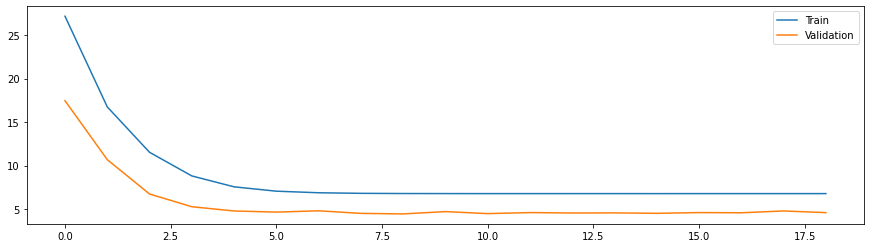

In [88]:
plt.figure(figsize=(15,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train','Validation'])

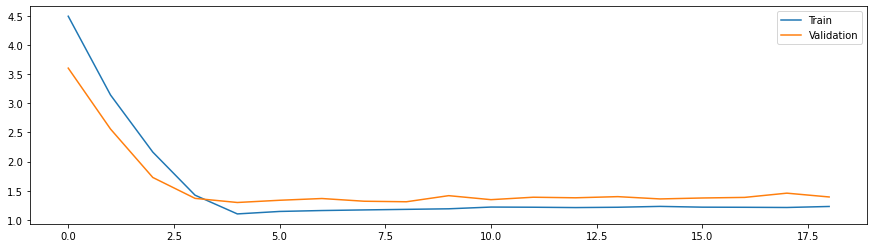

In [89]:
plt.figure(figsize=(15,4))
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.legend(['Train','Validation'])

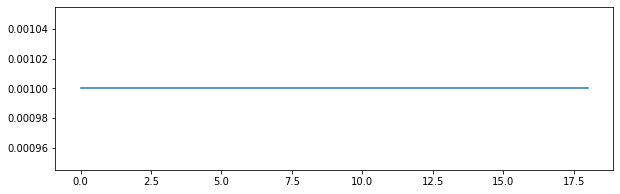

In [90]:
plt.figure(figsize = (10,3))
plt.plot(history.history['lr'])

In [91]:
pred = model.predict(X_test)

In [92]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,pred))
rmse

3.2862438852987914

In [93]:
pd_test = pd.Series(y_test)
pd_test.index+=y_train.shape[0]


In [94]:
pd_pred = pd.Series(pred.reshape(1,-1)[0])
pd_pred.index+=y_train.shape[0]

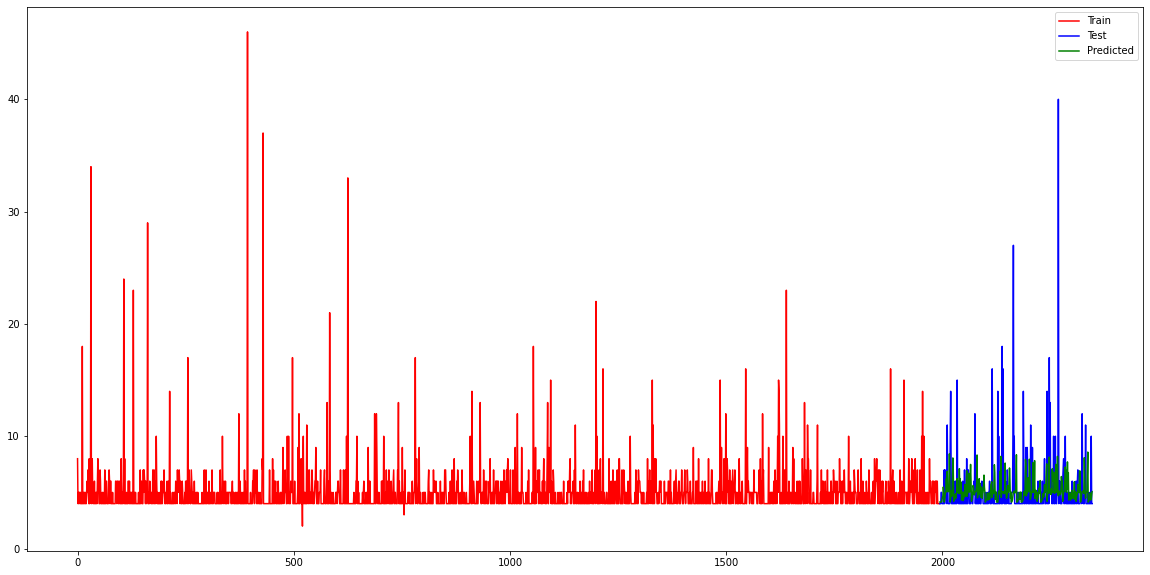

In [95]:
plt.figure(figsize = (20,10))
plt.plot(y_train,'-r',label = 'Train')
plt.plot(pd_test,'-b',label ='Test')
plt.plot(pd_pred,'-g',label = 'Predicted')
plt.legend()